Step 1: Load & Explore the Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
import shap

C:\Users\viktor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = "./Data/adult.data.csv"
df = pd.read_csv(file_path, na_values="?")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [7]:
missing_sum = df.isnull().sum()
missing_sum

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [8]:
total_rows = len(df)
missing_percent = (missing_sum / total_rows) * 100
missing_percent

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
salary            0.000000
dtype: float64

In [9]:
def fill_missing_with_mode(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace  = True)
    return df
df = fill_missing_with_mode(df)

C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\3557381559.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace  = True)


In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

# Check for Outliers

📌 Outliers detected in column: age


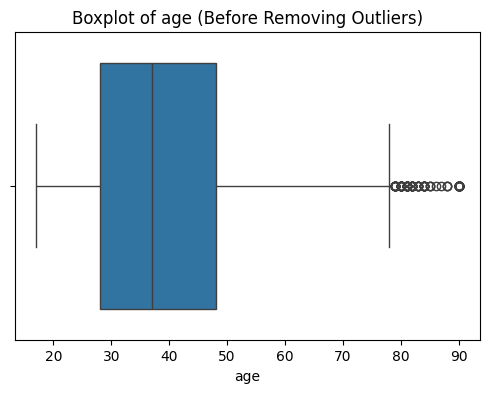

📌 Outliers detected in column: fnlwgt


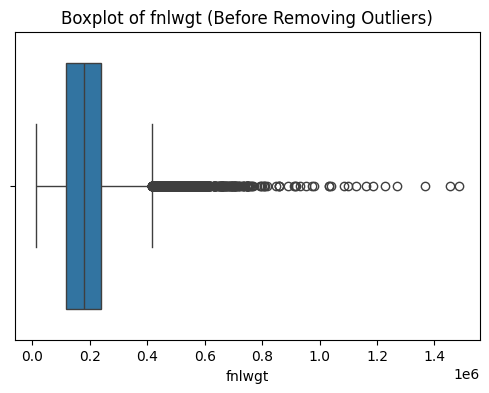

📌 Outliers detected in column: education-num


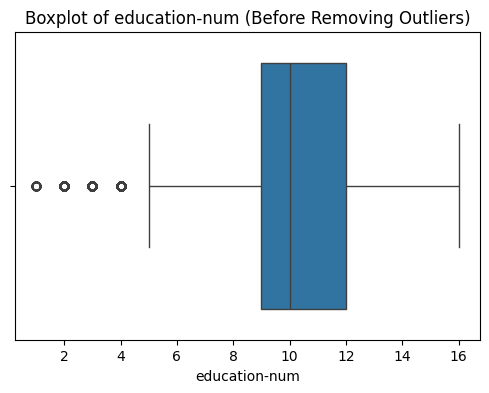

📌 Outliers detected in column: capital-gain


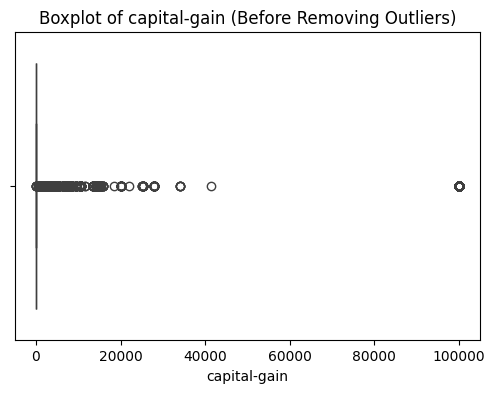

📌 Outliers detected in column: capital-loss


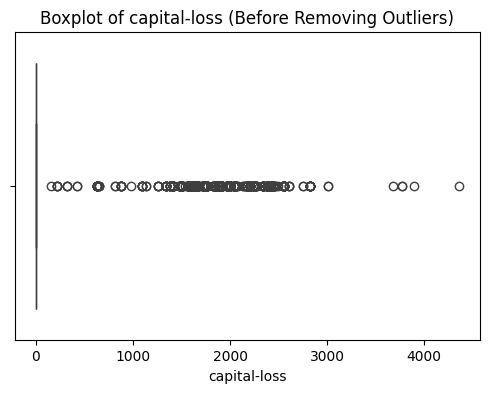

📌 Outliers detected in column: hours-per-week


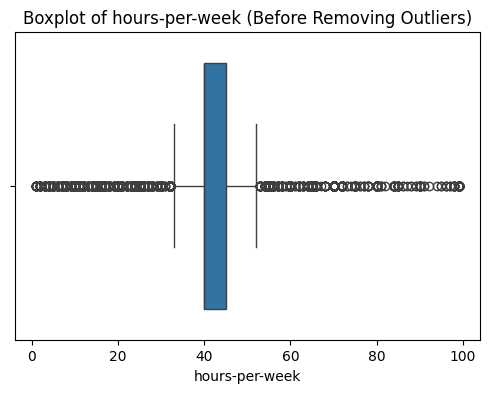


 Outliers removed successfully!

Columns that had outliers: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [11]:
def remove_outliers(df):
    num_cols = df.select_dtypes(include=np.number).columns
    cols_with_outliers = []

    for col in num_cols:
        # Calculate Q1,Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Compute IQR
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # If outliers exist, plot a boxplot and print the columns name
        if not outliers.empty:
            cols_with_outliers.append(col)
            print(f"📌 Outliers detected in column: {col}")

            # Plot boxplot
            plt.figure(figsize=(6,4))
            sns.boxplot(x = df[col])
            plt.title(f"Boxplot of {col} (Before Removing Outliers)")
            plt.show()

        # Remove Outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    print("\n Outliers removed successfully!\n")
    print("Columns that had outliers:", cols_with_outliers)

    return df

df_cleaned = remove_outliers(df)

Age

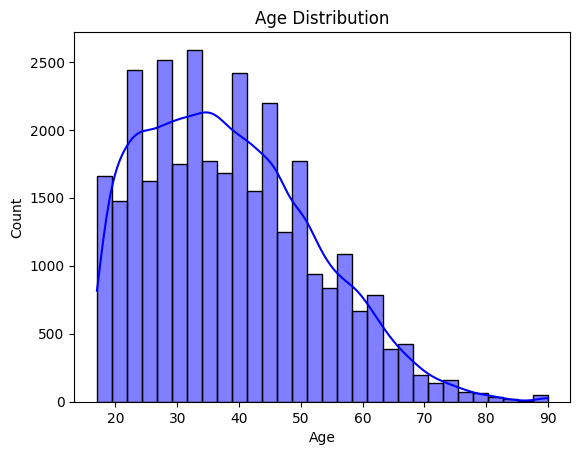

In [12]:
sns.histplot(df["age"], bins = 30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Boxplot of age by salary

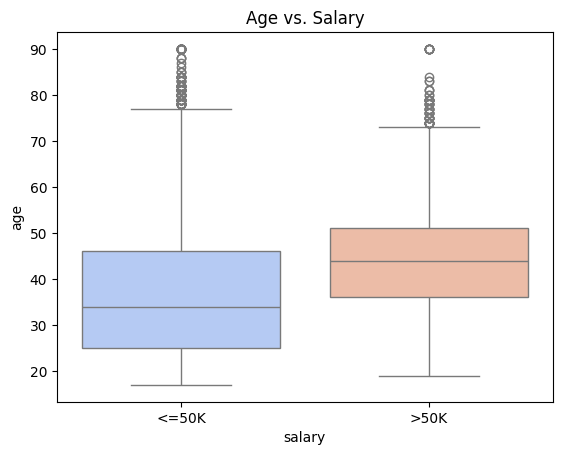

In [13]:
sns.boxplot(data=df, x="salary", y="age", hue="salary", palette="coolwarm")
plt.title("Age vs. Salary")
plt.show()

Age vs Gender

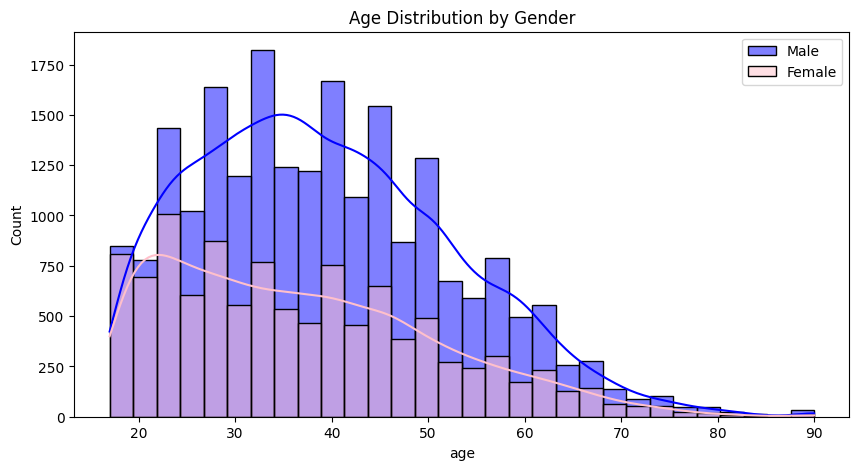

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["sex"] == "Male"]["age"], bins = 30, kde=True, color="blue", label="Male")
sns.histplot(df[df["sex"] == "Female"]["age"], bins = 30, kde=True, color="pink", label="Female")
plt.title("Age Distribution by Gender")
plt.legend()
plt.show()

Age vs. Education

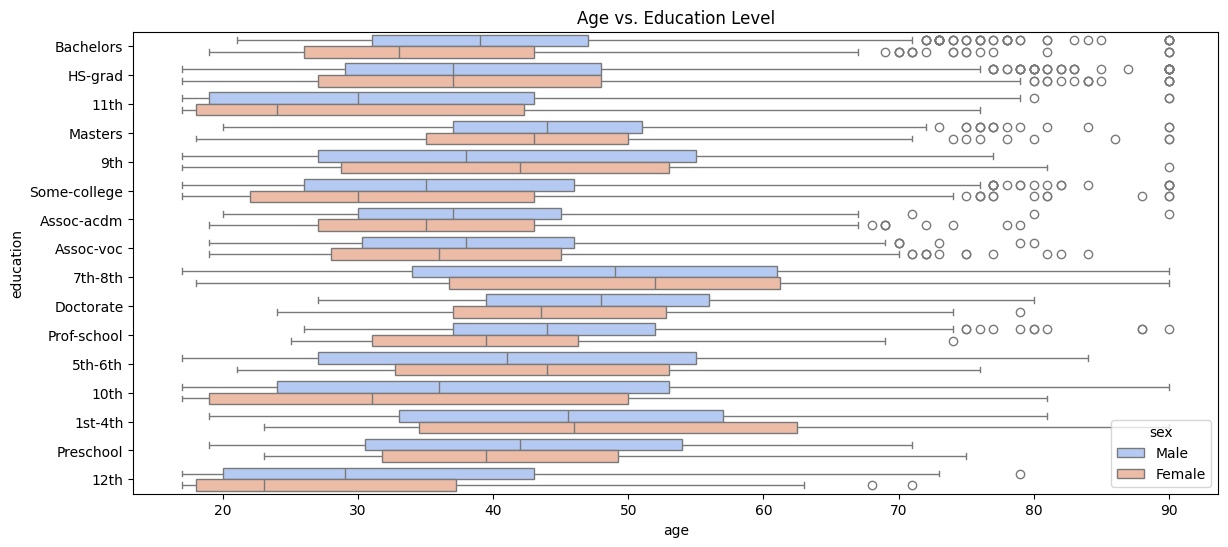

In [15]:
plt.figure(figsize=(14,6))
sns.boxplot(y="education", x = "age", hue = "sex", data = df, palette="coolwarm")
plt.title("Age vs. Education Level")
plt.show()

Age vs. Workclass

C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\201755721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="workclass", x="age", data=df, palette="viridis")


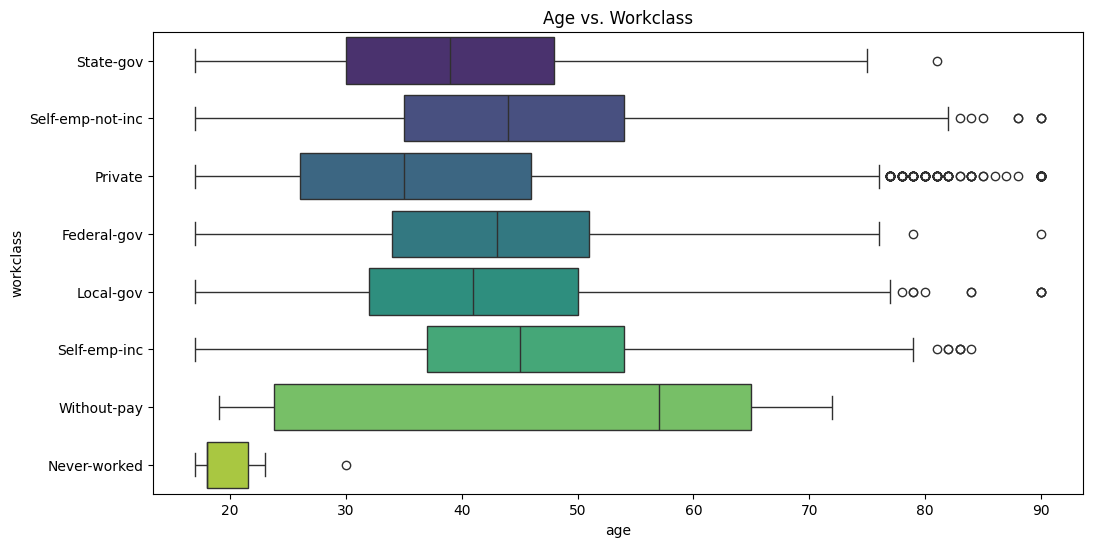

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(y="workclass", x="age", data=df, palette="viridis")
plt.title("Age vs. Workclass")
plt.show()

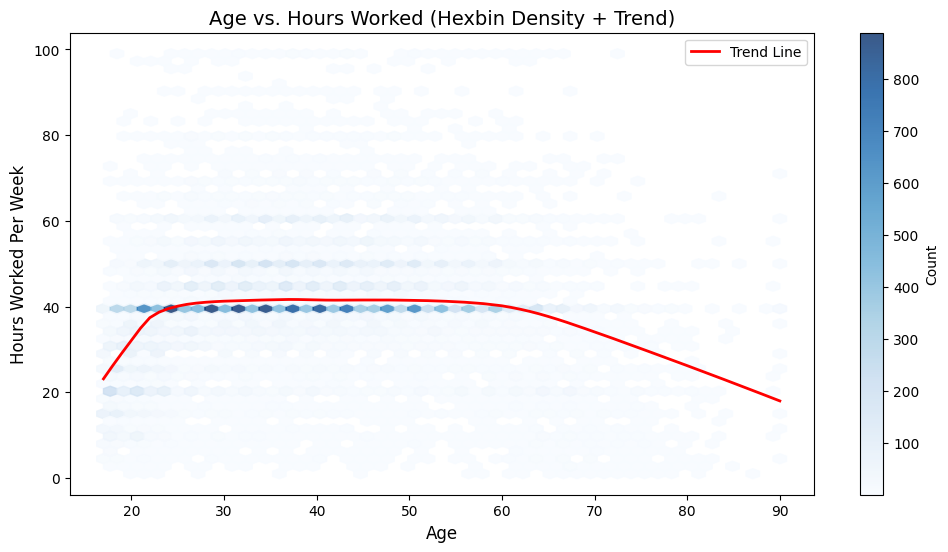

In [17]:
plt.figure(figsize=(12, 6))

# Use hexbin plot for better clarity
hb = plt.hexbin(df["age"], df["hours-per-week"], gridsize=50, cmap="Blues", mincnt=1, alpha=0.8)

# Add color bar to indicate density
cb = plt.colorbar(hb)
cb.set_label("Count")

# Overlay a Lowess regression line to show trend
import statsmodels.api as sm
lowess = sm.nonparametric.lowess(df["hours-per-week"], df["age"], frac=0.2)
plt.plot(lowess[:, 0], lowess[:, 1], color="red", linewidth=2, label="Trend Line")

# Titles and Labels
plt.title("Age vs. Hours Worked (Hexbin Density + Trend)", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Hours Worked Per Week", fontsize=12)
plt.legend()

plt.show()

C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\2929726835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="occupation", x="age", data=df, palette="magma")


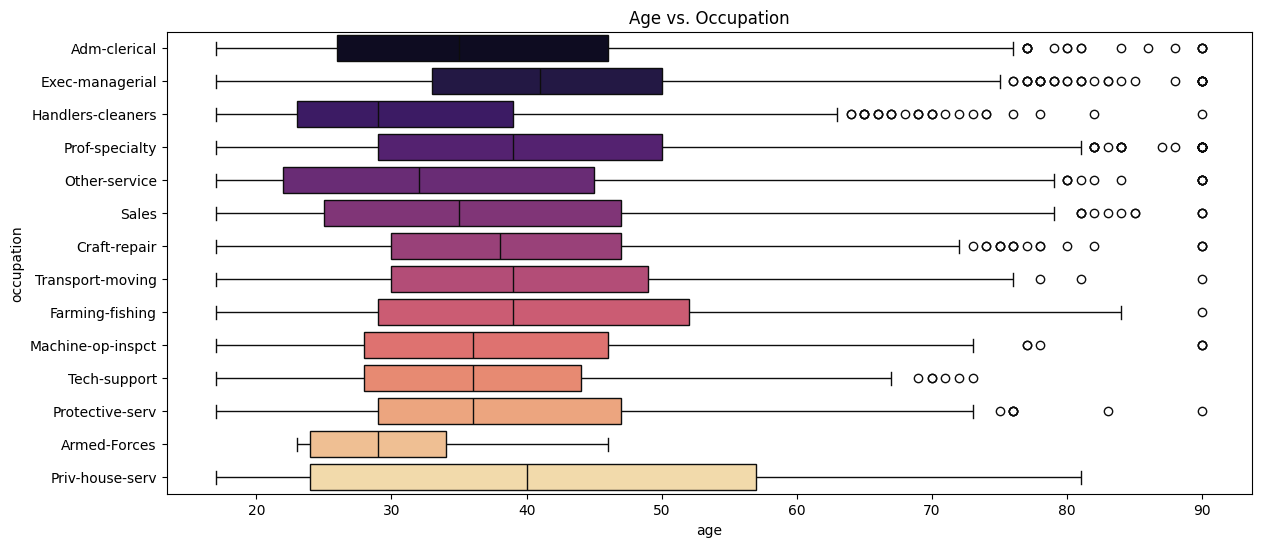

In [18]:
plt.figure(figsize=(14, 6))
sns.boxplot(y="occupation", x="age", data=df, palette="magma")
plt.title("Age vs. Occupation")
plt.show()


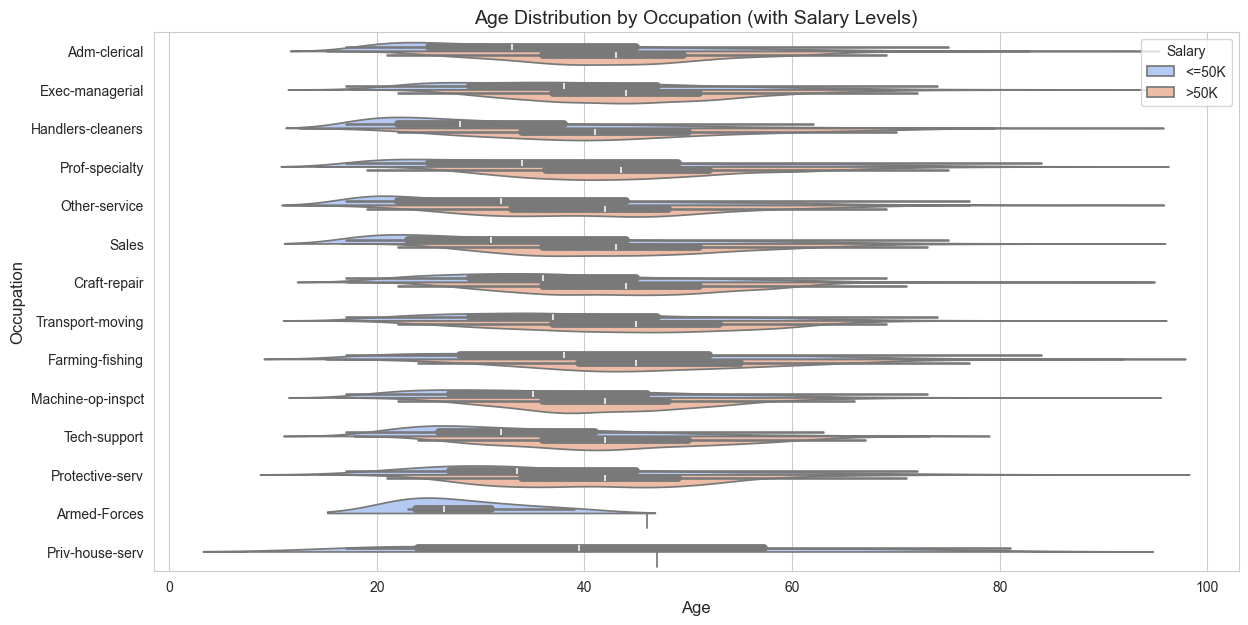

In [19]:

# Set the figure size and style
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Create a violin plot for better distribution visualization
sns.violinplot(y="occupation", x="age", data=df, hue="salary", palette="coolwarm", split=True)

# Improve readability
plt.xlabel("Age", fontsize=12)
plt.ylabel("Occupation", fontsize=12)
plt.title("Age Distribution by Occupation (with Salary Levels)", fontsize=14)
plt.legend(title="Salary", loc="upper right")

# Show the plot
plt.show()

C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\2772747075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="marital-status", x="age", data=df, palette="coolwarm")


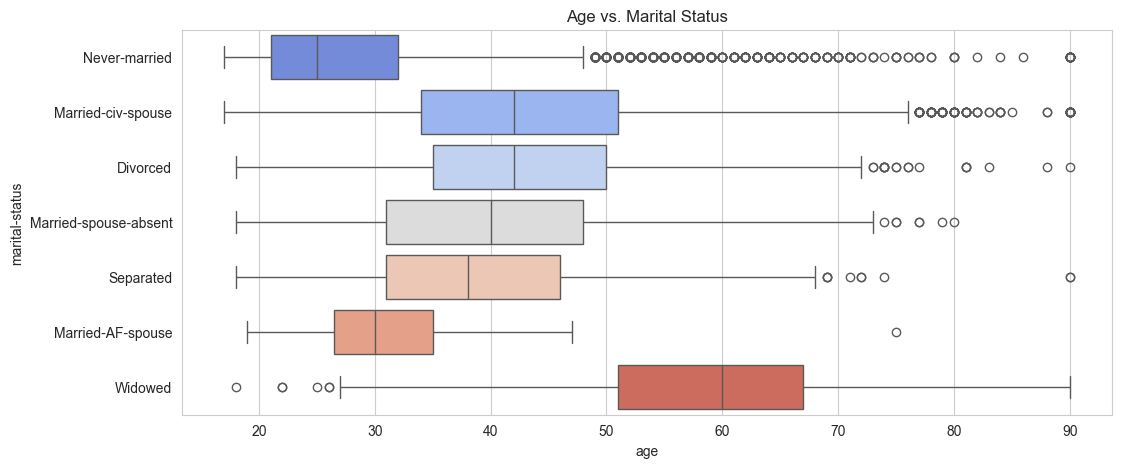

In [20]:
plt.figure(figsize=(12, 5))
sns.boxplot(y="marital-status", x="age", data=df, palette="coolwarm")
plt.title("Age vs. Marital Status")
plt.show()


Age vs. Native Country

C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\3619603849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="native-country", x="age", data=df, palette="cubehelix")


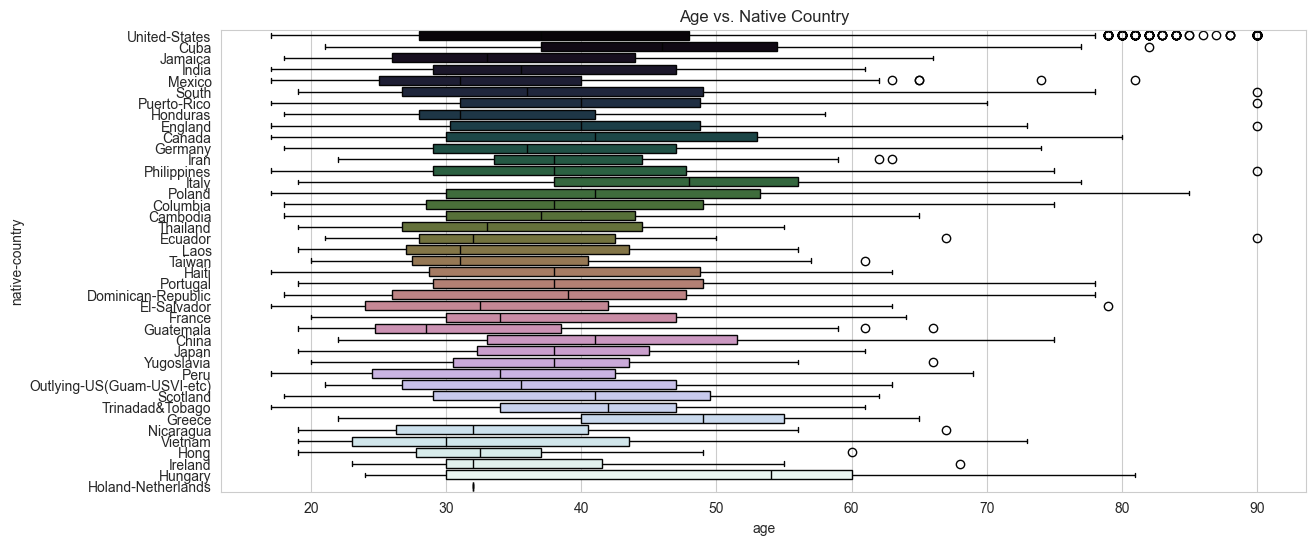

In [21]:
plt.figure(figsize=(14, 6))
sns.boxplot(y="native-country", x="age", data=df, palette="cubehelix")
plt.title("Age vs. Native Country")
plt.show()


C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\1564997004.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y="native-country", x="age", data=df, order=sorted_countries, palette="coolwarm")


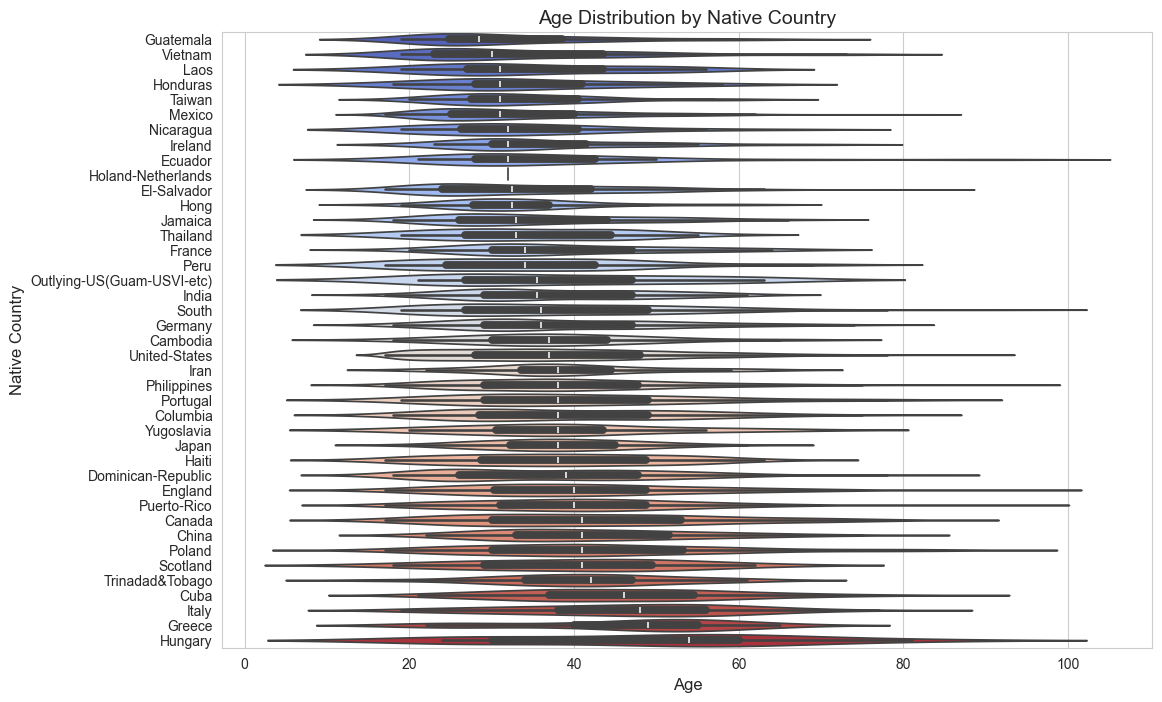

In [22]:
# Set figure size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Sort countries by median age for better readability
sorted_countries = df.groupby("native-country")["age"].median().sort_values().index

# Create a violin plot to show age distribution
sns.violinplot(y="native-country", x="age", data=df, order=sorted_countries, palette="coolwarm")

# Improve readability
plt.xlabel("Age", fontsize=12)
plt.ylabel("Native Country", fontsize=12)
plt.title("Age Distribution by Native Country", fontsize=14)

# Show the plot
plt.show()

Gender Disparity: Do Men Earn More?

C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\3658104034.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=df, palette="coolwarm")


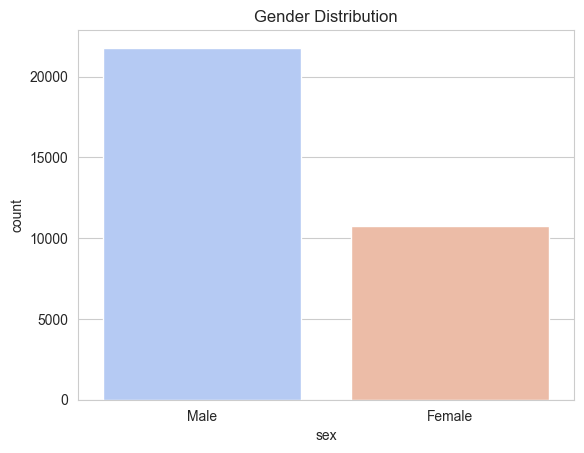

In [23]:
sns.countplot(x="sex", data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()


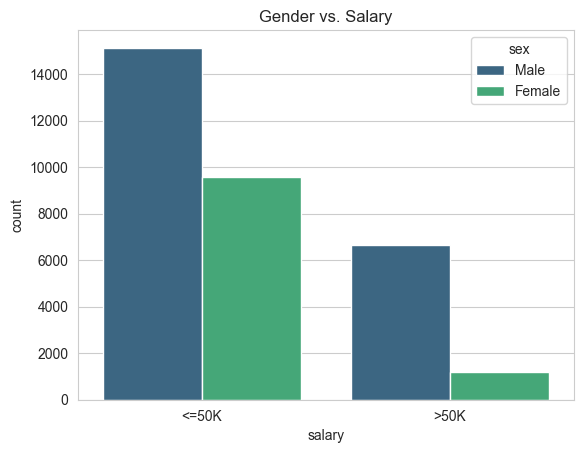

In [24]:
sns.countplot(x="salary", hue="sex", data=df, palette="viridis")
plt.title("Gender vs. Salary")
plt.show()


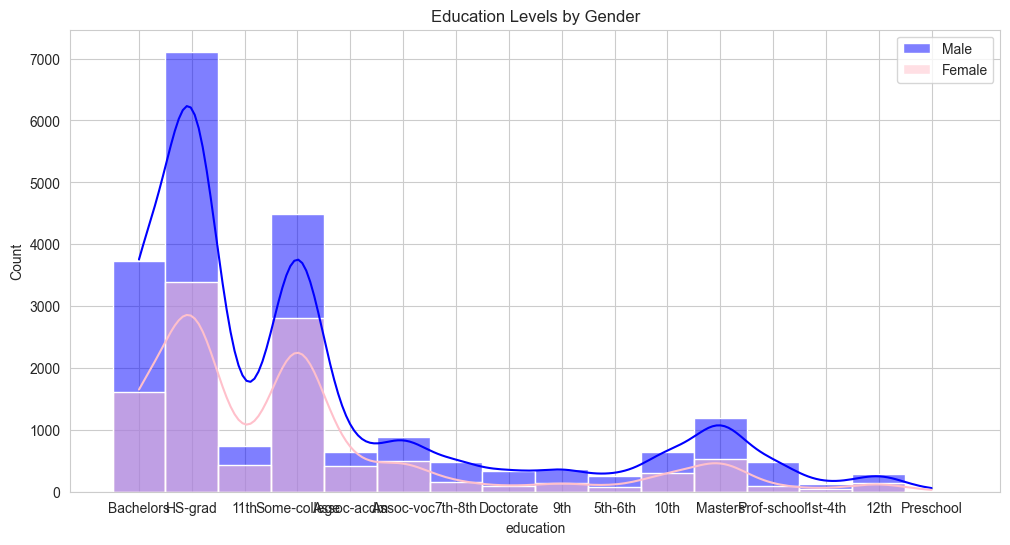

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df["sex"] == "Male"]["education"], color="blue", label="Male", kde=True)
sns.histplot(df[df["sex"] == "Female"]["education"], color="pink", label="Female", kde=True)
plt.title("Education Levels by Gender")
plt.legend()
plt.show()


In [26]:
advanced_education = df["education"].isin(["Bachelors","Masters","Doctorate"])
high_income = df["salary"] == ">50K"

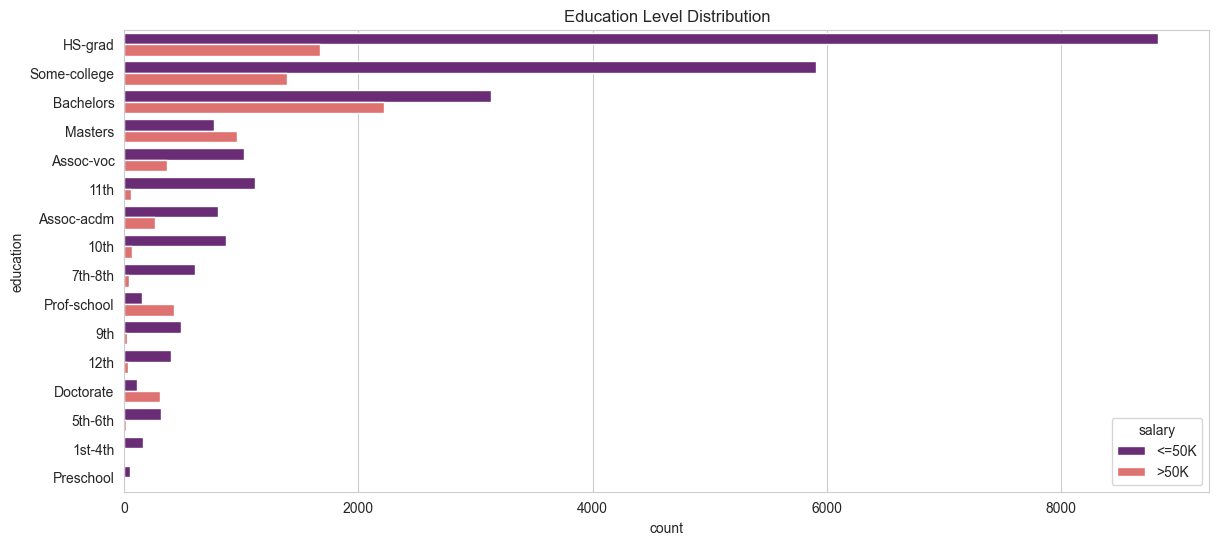

In [27]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, y="education", hue="salary", order=df["education"].value_counts().index, palette="magma")
plt.title("Education Level Distribution")
plt.show()

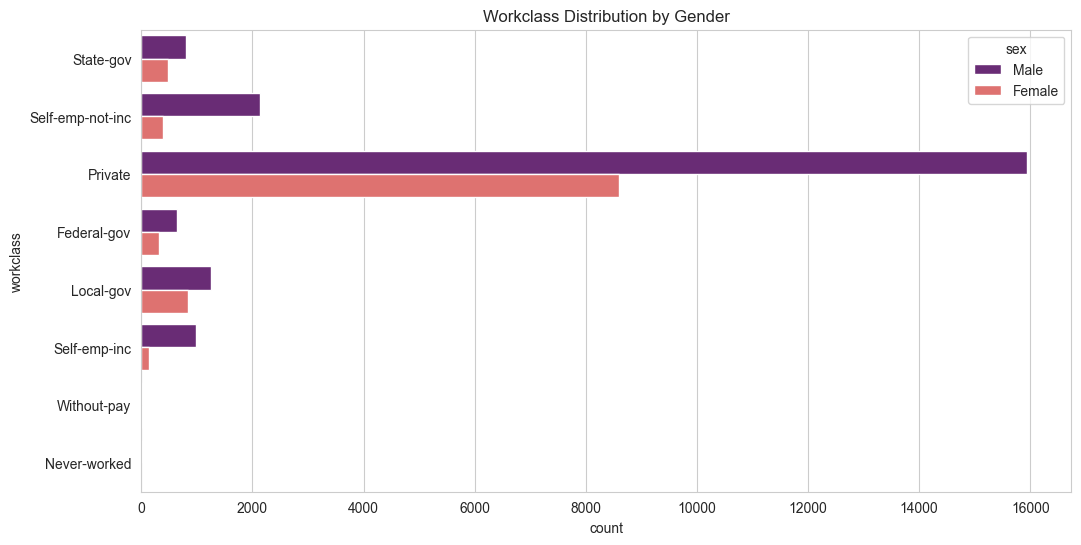

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(y="workclass", hue="sex", data=df, palette="magma")
plt.title("Workclass Distribution by Gender")
plt.show()


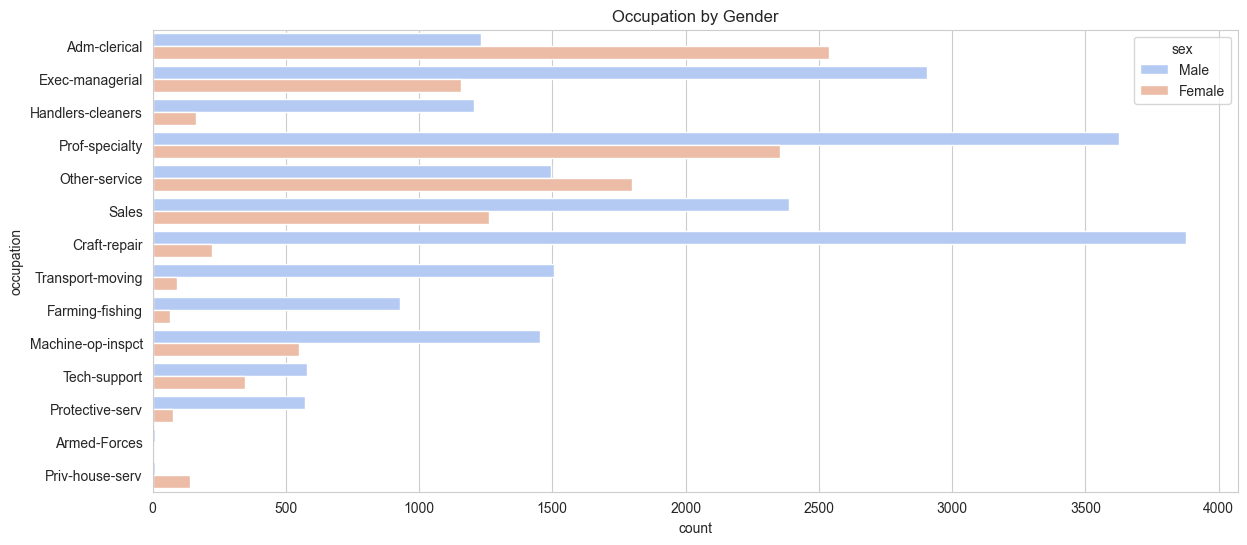

In [29]:
plt.figure(figsize=(14, 6))
sns.countplot(y="occupation", hue="sex", data=df, palette="coolwarm")
plt.title("Occupation by Gender")
plt.show()


C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\3331766044.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sex", y="hours-per-week", data=df, palette="Set2")


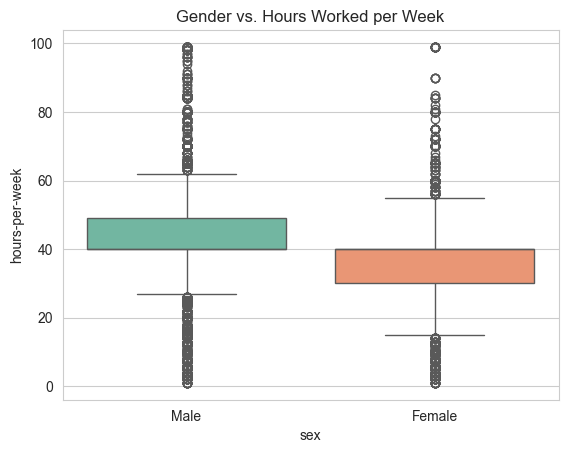

In [30]:
sns.boxplot(x="sex", y="hours-per-week", data=df, palette="Set2")
plt.title("Gender vs. Hours Worked per Week")
plt.show()


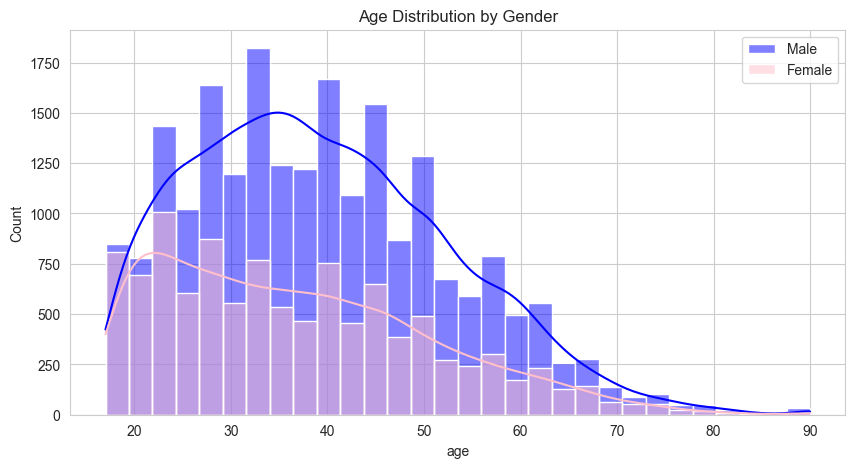

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df["sex"] == "Male"]["age"], bins=30, kde=True, color="blue", label="Male")
sns.histplot(df[df["sex"] == "Female"]["age"], bins=30, kde=True, color="pink", label="Female")
plt.title("Age Distribution by Gender")
plt.legend()
plt.show()


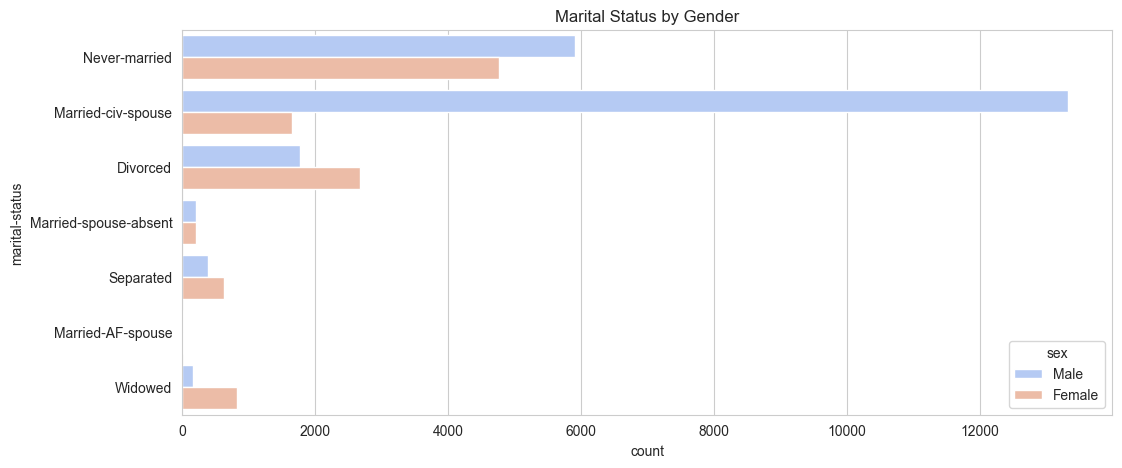

In [32]:
plt.figure(figsize=(12, 5))
sns.countplot(y="marital-status", hue="sex", data=df, palette="coolwarm")
plt.title("Marital Status by Gender")
plt.show()


C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\2974914206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sex", y="capital-gain", data=df, palette="cubehelix")


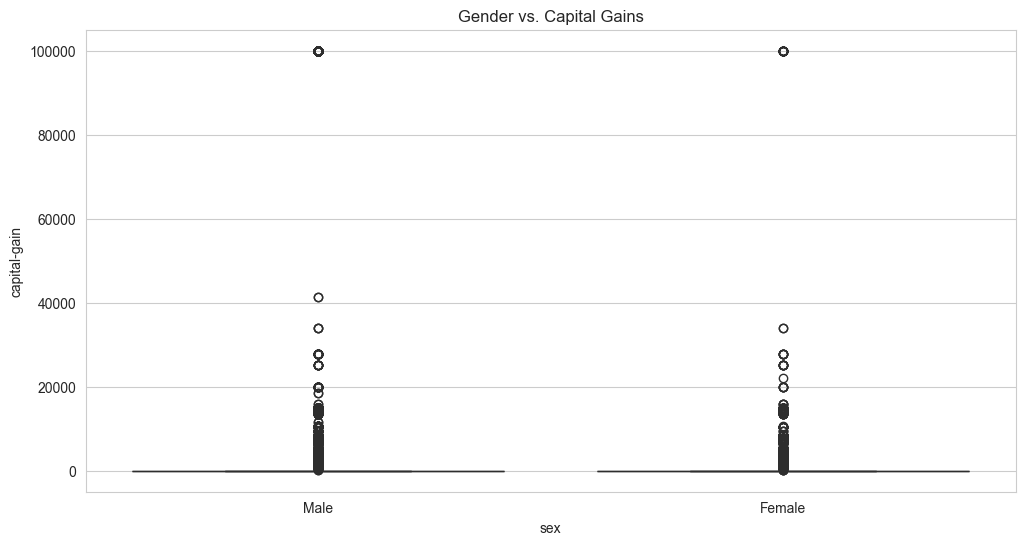

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="sex", y="capital-gain", data=df, palette="cubehelix")
plt.title("Gender vs. Capital Gains")
plt.show()


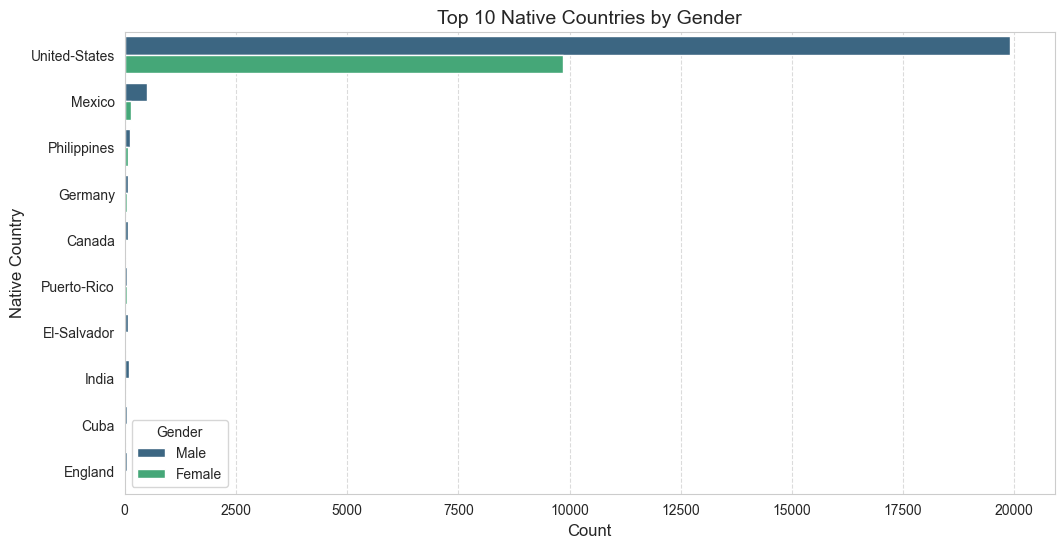

In [34]:
# Sort by count and take the top 10 countries
top_countries = df["native-country"].value_counts().index[:10]
df_top = df[df["native-country"].isin(top_countries)]

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a horizontal bar plot
sns.countplot(y="native-country", hue="sex", data=df_top, palette="viridis", order=top_countries)

# Improve readability
plt.xlabel("Count", fontsize=12)
plt.ylabel("Native Country", fontsize=12)
plt.title("Top 10 Native Countries by Gender", fontsize=14)
plt.legend(title="Gender")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [35]:
average_age_men = round(df.loc[df["sex"] == "Male", "age"].mean(), 2)
average_age_men

np.float64(39.43)

In [36]:
percentage_bachelors = round((df["education"] == "Bachelors").mean() * 100, 2)
percentage_bachelors

np.float64(16.45)

C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\3072251673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, y = "education", order = df["education"].value_counts().index, palette="coolwarm")


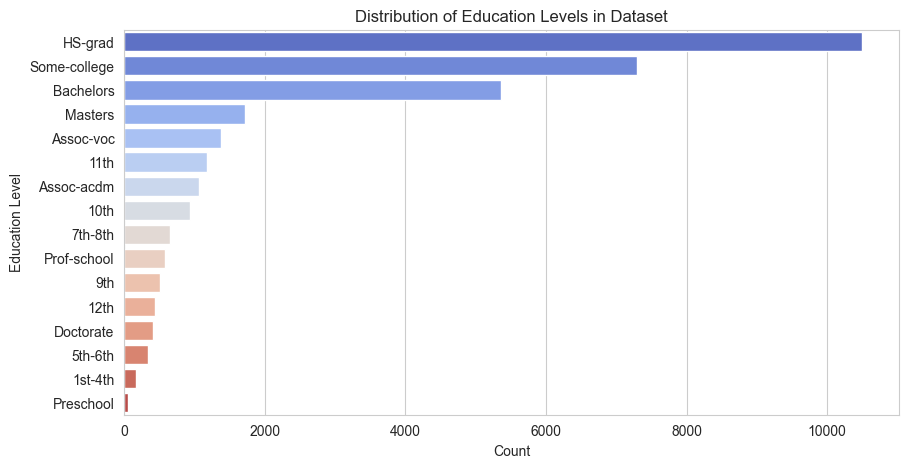

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, y = "education", order = df["education"].value_counts().index, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.title("Distribution of Education Levels in Dataset")
plt.show()

In [38]:
higher_education_rich = round(df.loc[advanced_education & high_income, "salary"].count() / df.loc[advanced_education, "salary"].count() * 100, 2)
higher_education_rich

np.float64(46.54)

In [39]:
lower_education_rich = round(df.loc[~advanced_education & high_income, "salary"].count() / df.loc[~advanced_education, "salary"].count() * 100, 2)
lower_education_rich

np.float64(17.37)

C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\3777851391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Higher Education", "Lower Education"], y = [higher_education_rich, lower_education_rich], palette="Set2")


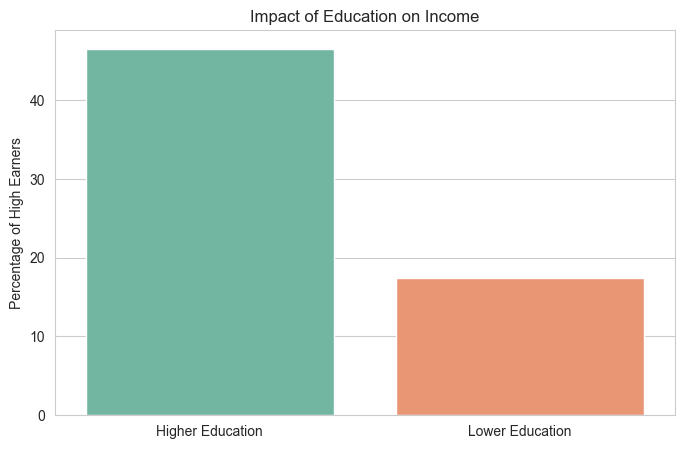

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x=["Higher Education", "Lower Education"], y = [higher_education_rich, lower_education_rich], palette="Set2")
plt.ylabel("Percentage of High Earners")
plt.title("Impact of Education on Income")
plt.show()

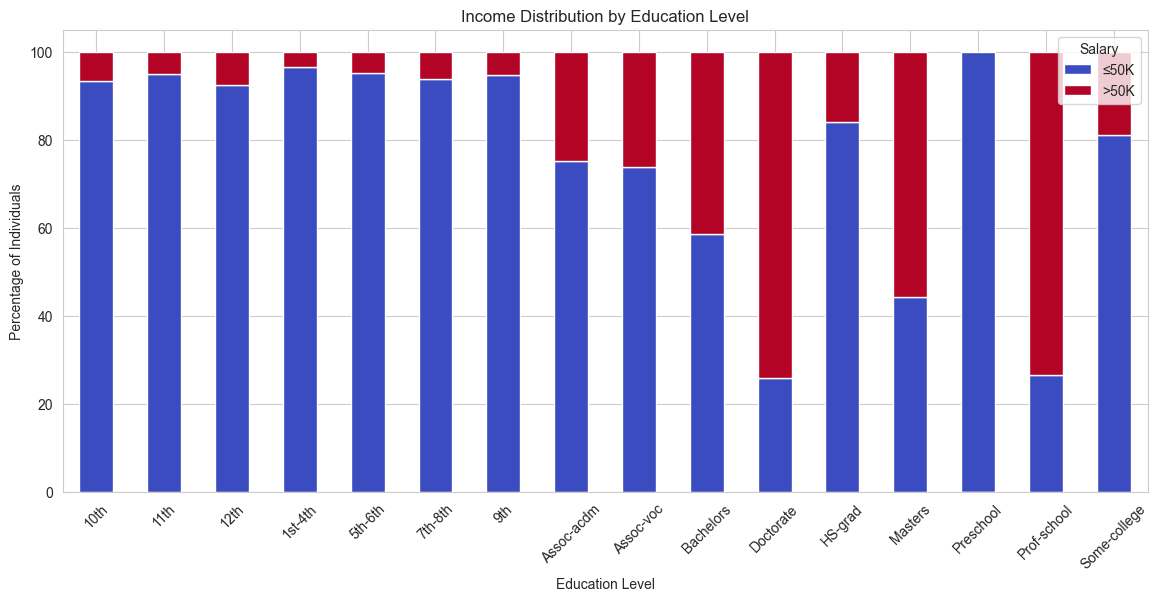

In [41]:
education_salary_counts = df.groupby(["education", "salary"]).size().unstack()

# Normalize counts to get percentages
education_salary_percent = education_salary_counts.div(education_salary_counts.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
education_salary_percent.plot(kind='bar', stacked=True, figsize=(14,6), colormap="coolwarm")

plt.xlabel("Education Level")
plt.ylabel("Percentage of Individuals")
plt.title("Income Distribution by Education Level")
plt.legend(title="Salary", labels=["≤50K", ">50K"])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

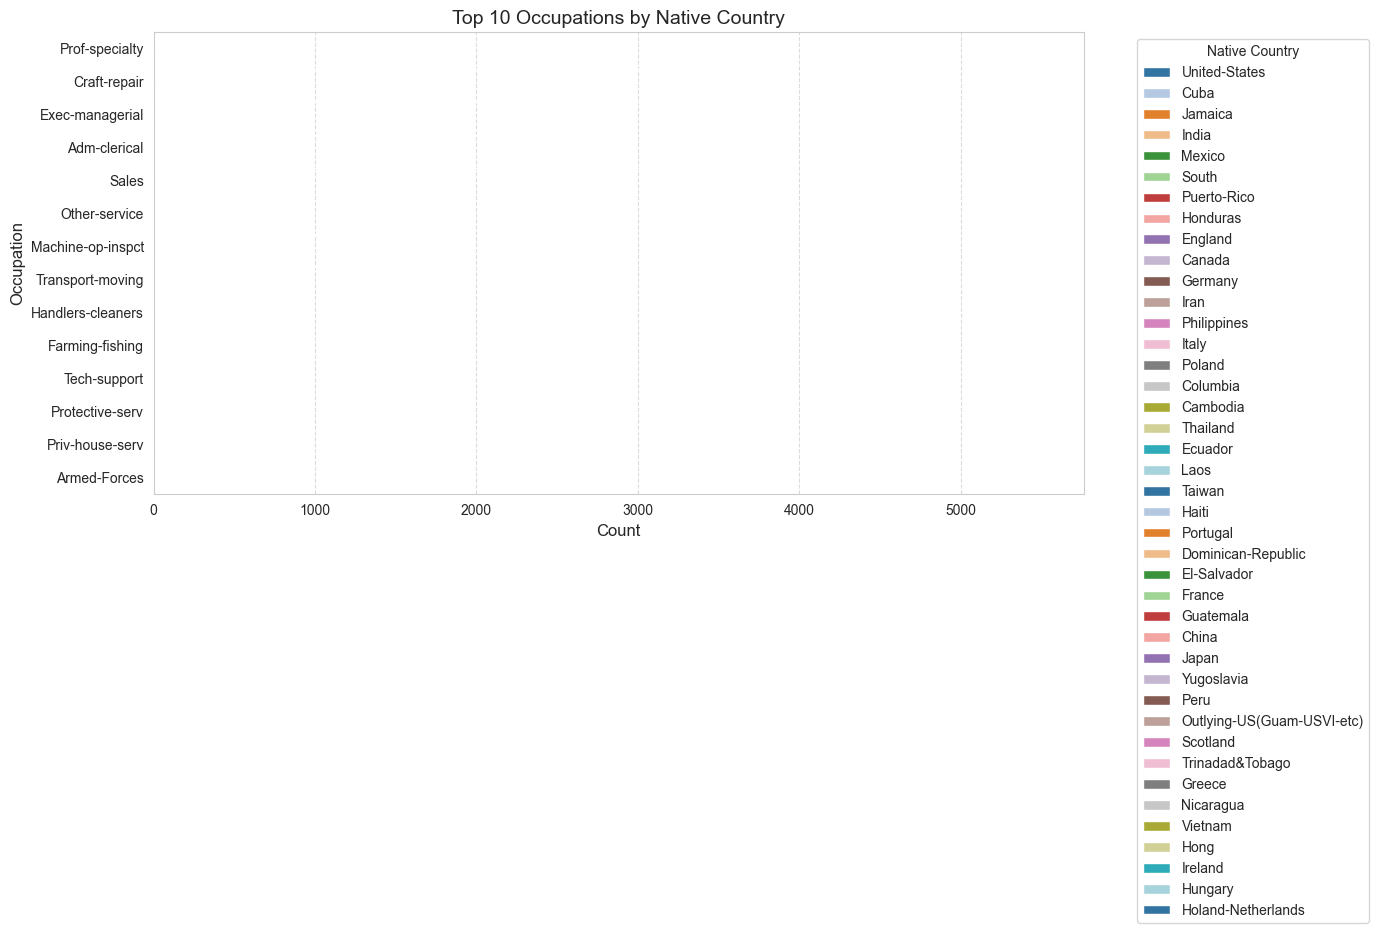

In [42]:
# Select the top 10 most common occupations
top_occupations = df["occupation"].value_counts().index[:15]
df_top = df[df["occupation"].isin(top_occupations)]

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Use a better color palette and order bars by frequency
sns.countplot(data=df_top, y="occupation", hue="native-country", palette="tab20", 
              order=top_occupations)

# Improve readability
plt.xlabel("Count", fontsize=12)
plt.ylabel("Occupation", fontsize=12)
plt.title("Top 10 Occupations by Native Country", fontsize=14)
plt.legend(title="Native Country", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\1166390772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="occupation", x="education-num", data=df, palette="coolwarm")


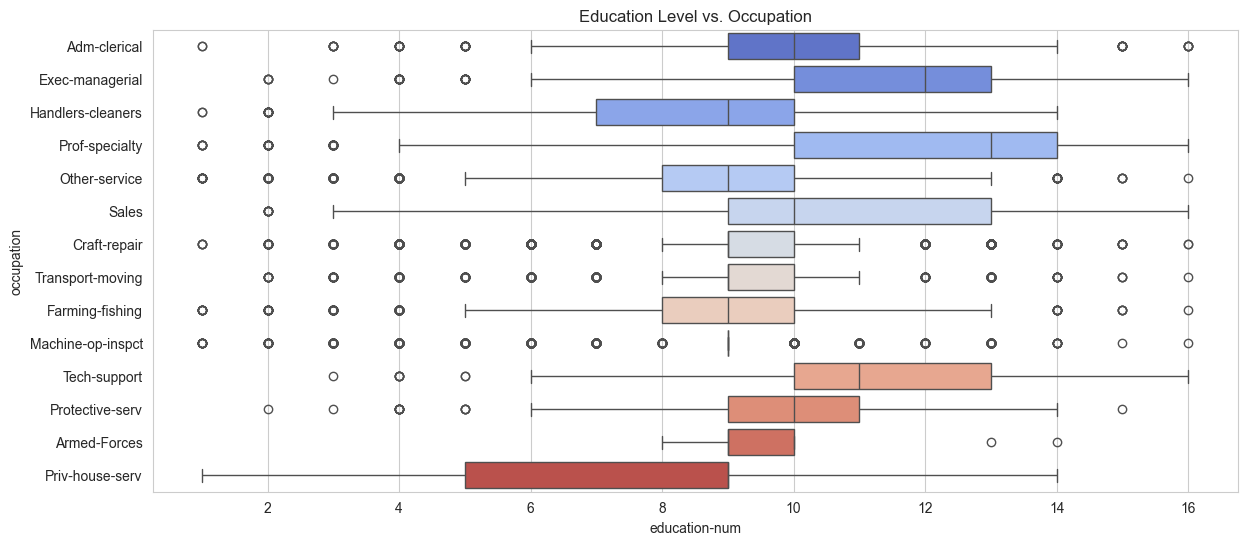

In [43]:
plt.figure(figsize=(14, 6))
sns.boxplot(y="occupation", x="education-num", data=df, palette="coolwarm")
plt.title("Education Level vs. Occupation")
plt.show()


C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\3995688090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="occupation", x="age", data=df, palette="magma")


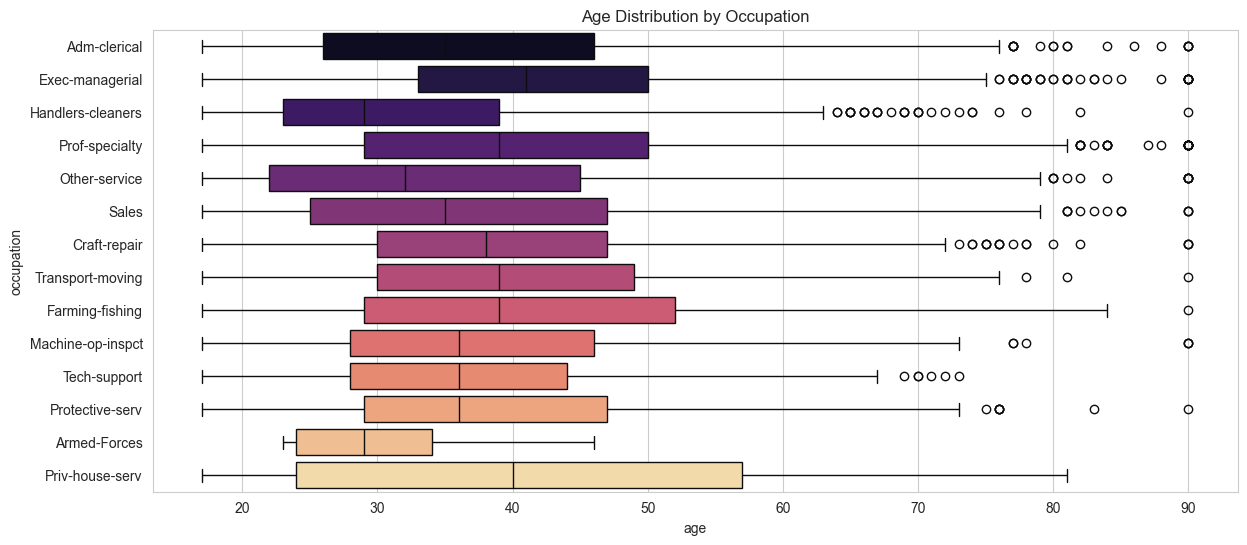

In [44]:
plt.figure(figsize=(14, 6))
sns.boxplot(y="occupation", x="age", data=df, palette="magma")
plt.title("Age Distribution by Occupation")
plt.show()


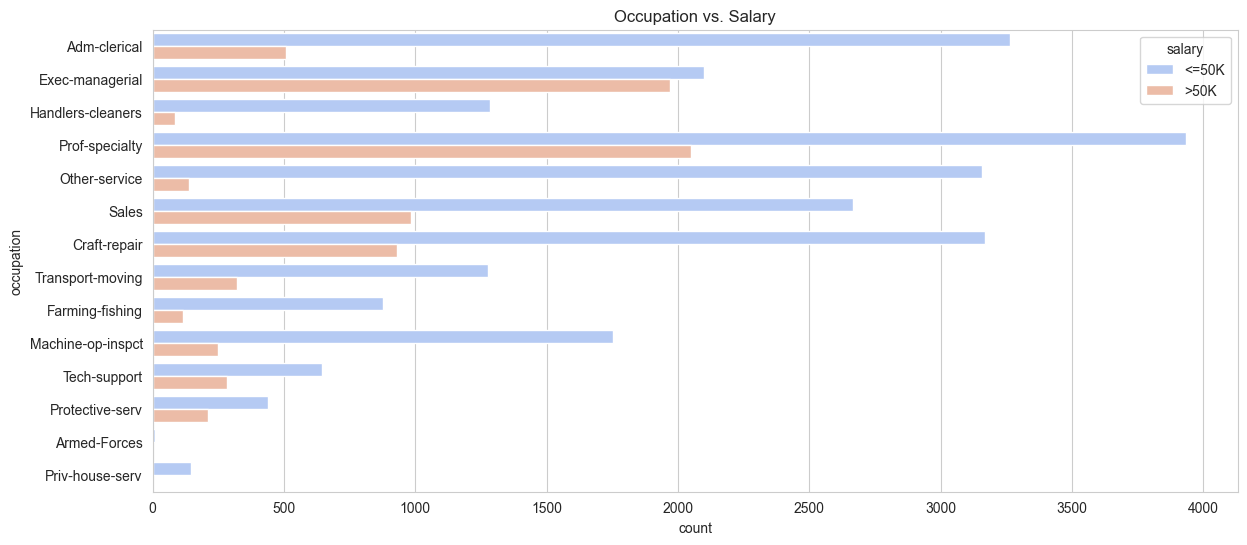

In [45]:
plt.figure(figsize=(14, 6))
sns.countplot(y="occupation", hue="salary", data=df, palette="coolwarm")
plt.title("Occupation vs. Salary")
plt.show()


C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\2681980016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="occupation", x="hours-per-week", data=df, palette="cubehelix")


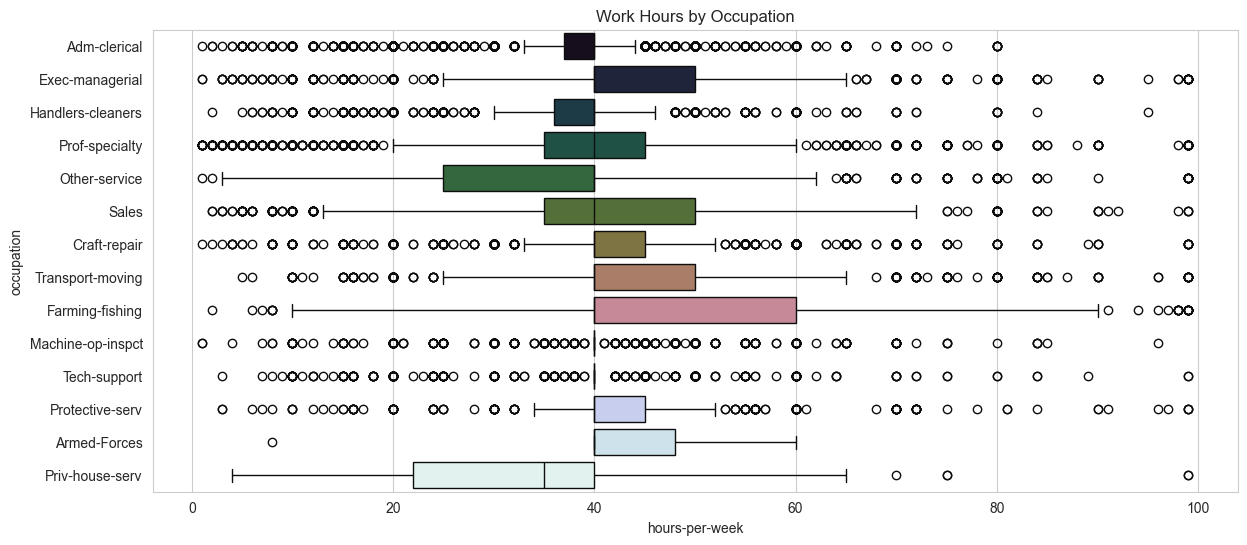

In [46]:
plt.figure(figsize=(14, 6))
sns.boxplot(y="occupation", x="hours-per-week", data=df, palette="cubehelix")
plt.title("Work Hours by Occupation")
plt.show()


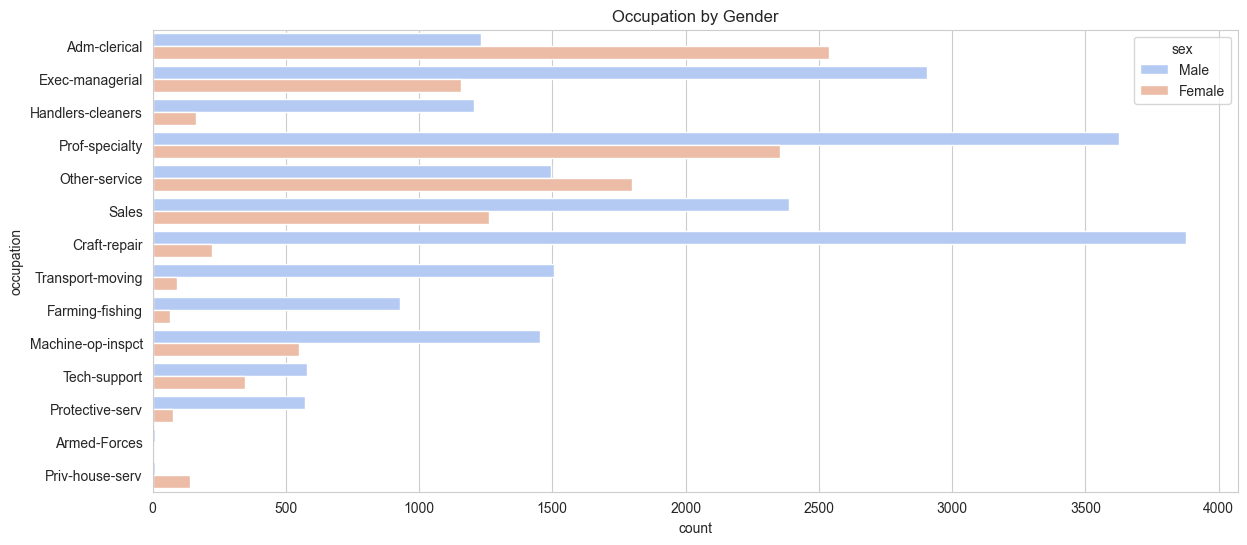

In [47]:
plt.figure(figsize=(14, 6))
sns.countplot(y="occupation", hue="sex", data=df, palette="coolwarm")
plt.title("Occupation by Gender")
plt.show()


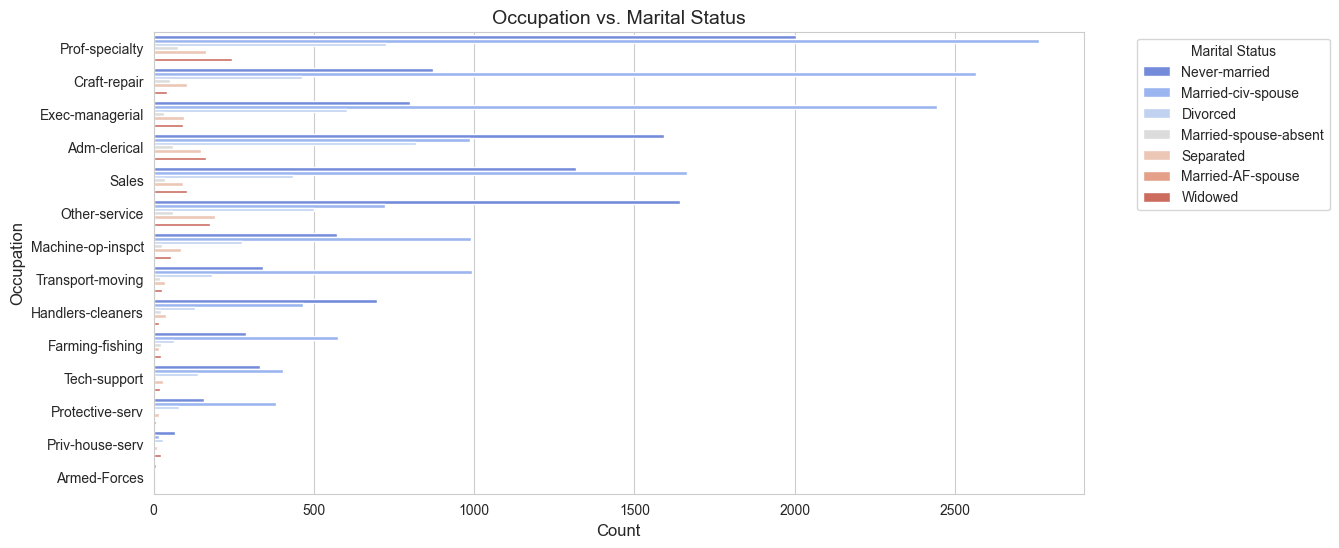

In [48]:
# Sort occupations by total count
occupation_counts = df["occupation"].value_counts().index
df_sorted = df[df["occupation"].isin(occupation_counts)]

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot countplot with better palette
sns.countplot(data=df_sorted, y="occupation", hue="marital-status", palette="coolwarm", 
              order=occupation_counts)

# Improve labels and title
plt.xlabel("Count", fontsize=12)
plt.ylabel("Occupation", fontsize=12)
plt.title("Occupation vs. Marital Status", fontsize=14)

# Move legend outside for better visibility
plt.legend(title="Marital Status", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

# Show plot
plt.show()

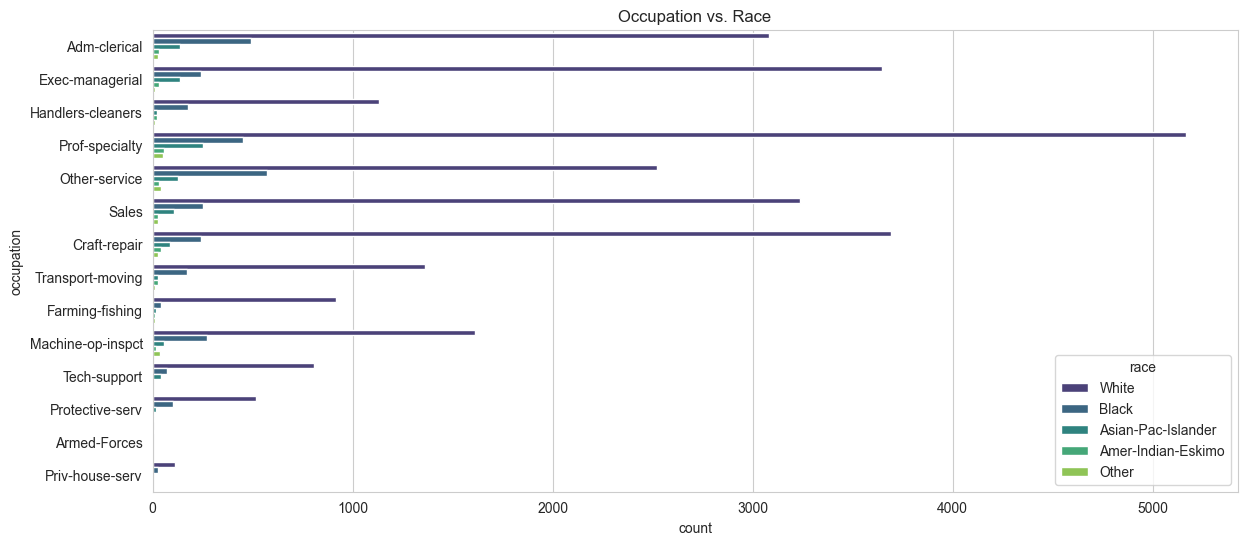

In [49]:
plt.figure(figsize=(14, 6))
sns.countplot(y="occupation", hue="race", data=df, palette="viridis")
plt.title("Occupation vs. Race")
plt.show()


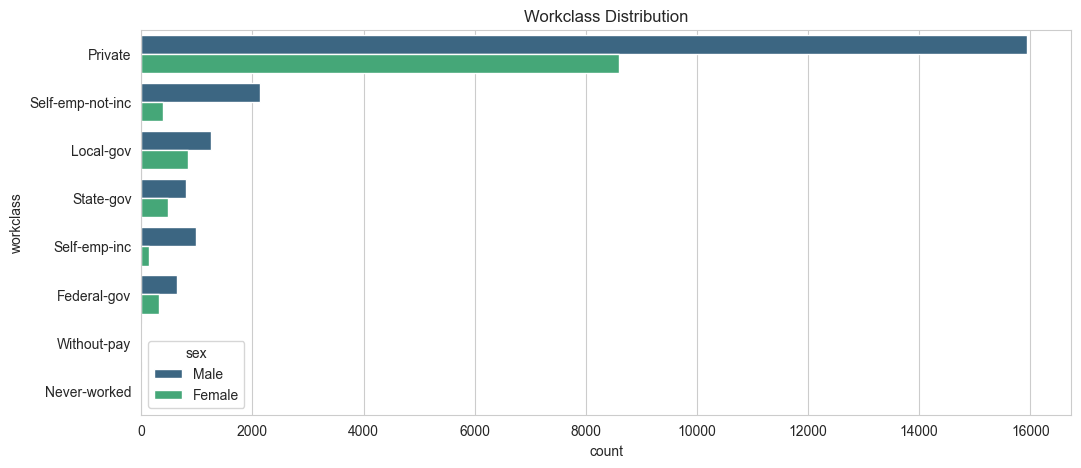

In [50]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, y="workclass", hue="sex", order=df["workclass"].value_counts().index, palette="viridis")
plt.title("Workclass Distribution")
plt.show()

C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\130660624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_count.index, y = race_count.values, palette="viridis")


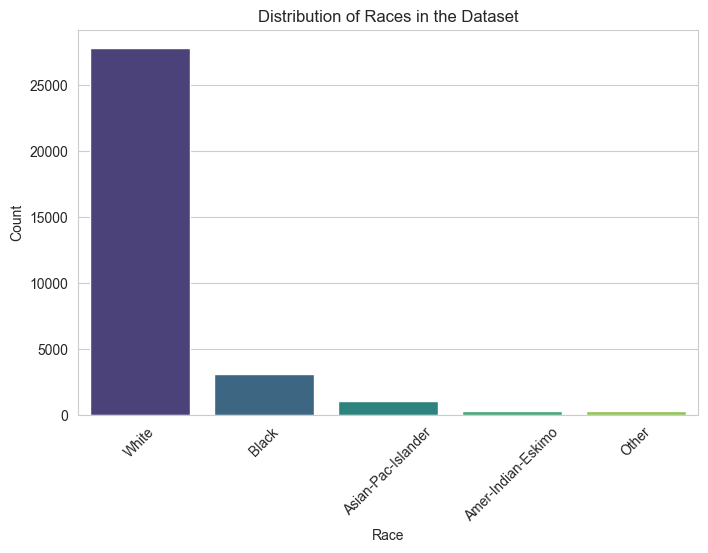

In [51]:
race_count = df["race"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=race_count.index, y = race_count.values, palette="viridis")
plt.xticks(rotation = 45)
plt.xlabel("Race")
plt.ylabel("Count")
plt.title("Distribution of Races in the Dataset")
plt.show()

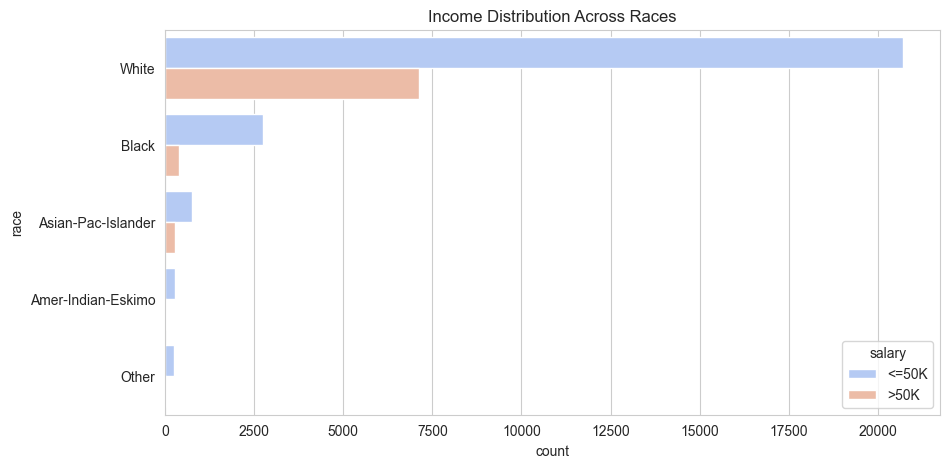

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(y="race", hue="salary", data=df, palette="coolwarm")
plt.title("Income Distribution Across Races")
plt.show()


C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\2189921911.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="salary", palette="coolwarm")


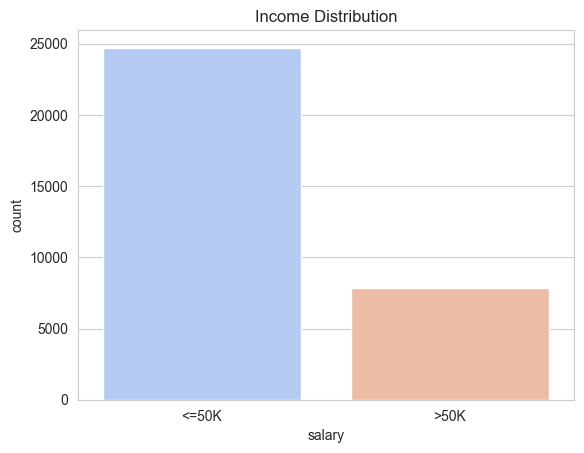

In [53]:
sns.countplot(data=df, x="salary", palette="coolwarm")
plt.title("Income Distribution")
plt.show()

C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\1269794437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="race", x="education-num", data=df, palette="magma")


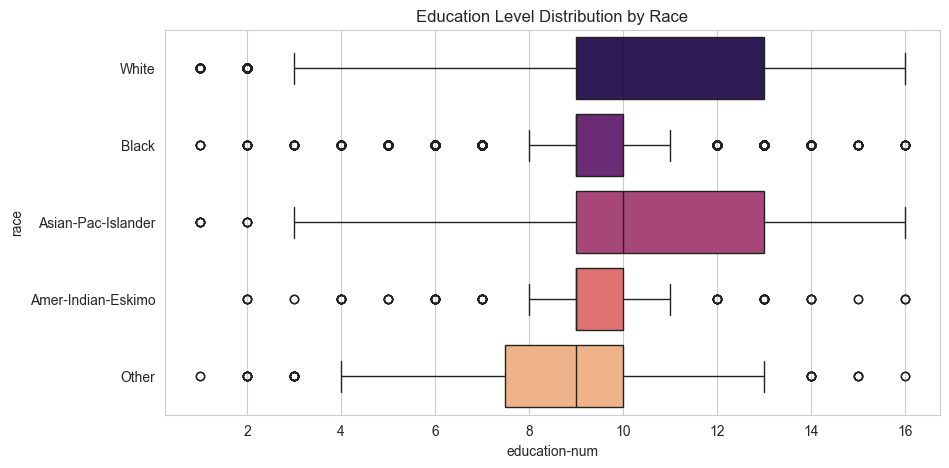

In [54]:
plt.figure(figsize=(10, 5))
sns.boxplot(y="race", x="education-num", data=df, palette="magma")
plt.title("Education Level Distribution by Race")
plt.show()


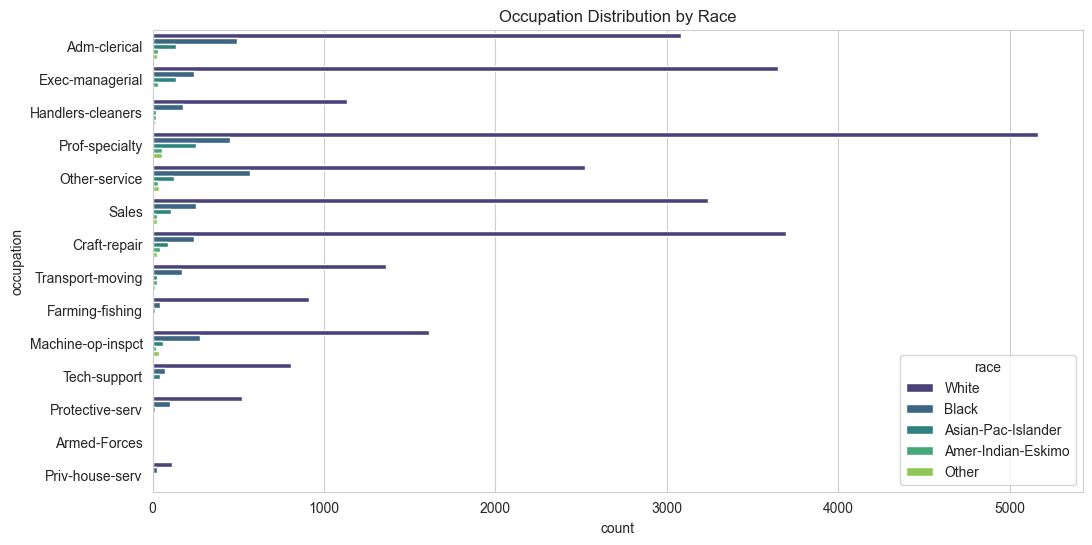

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(y="occupation", hue="race", data=df, palette="viridis")
plt.title("Occupation Distribution by Race")
plt.show()


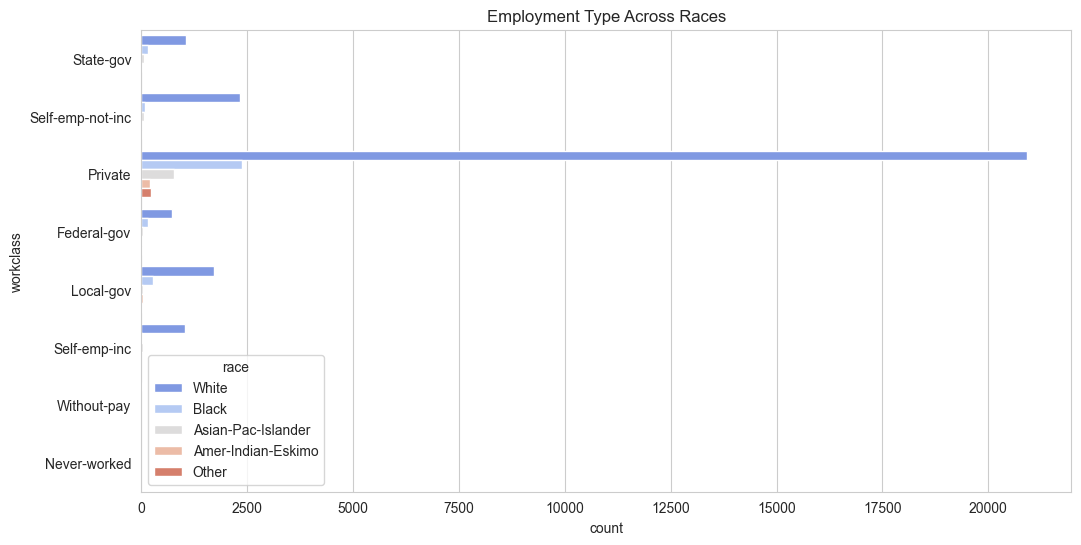

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(y="workclass", hue="race", data=df, palette="coolwarm")
plt.title("Employment Type Across Races")
plt.show()


C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\1980747472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="race", x="age", data=df, palette="magma")


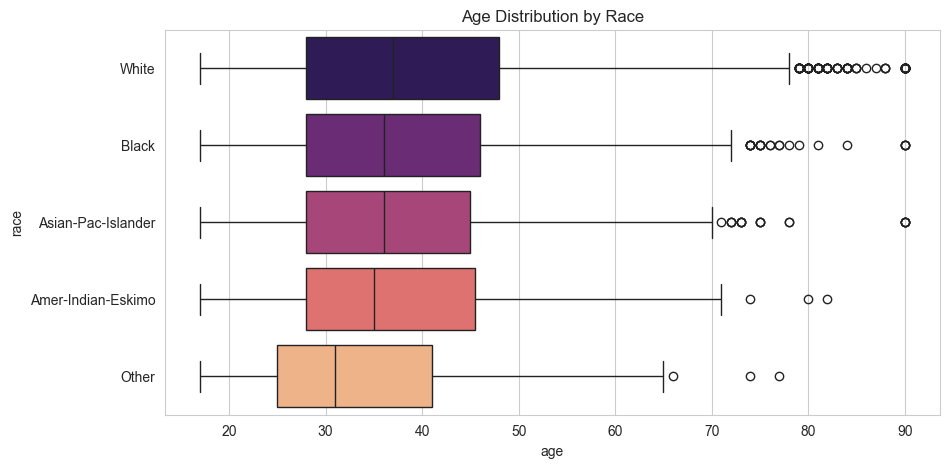

In [57]:
plt.figure(figsize=(10, 5))
sns.boxplot(y="race", x="age", data=df, palette="magma")
plt.title("Age Distribution by Race")
plt.show()


C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\500216340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="race", x="hours-per-week", data=df, palette="cubehelix")


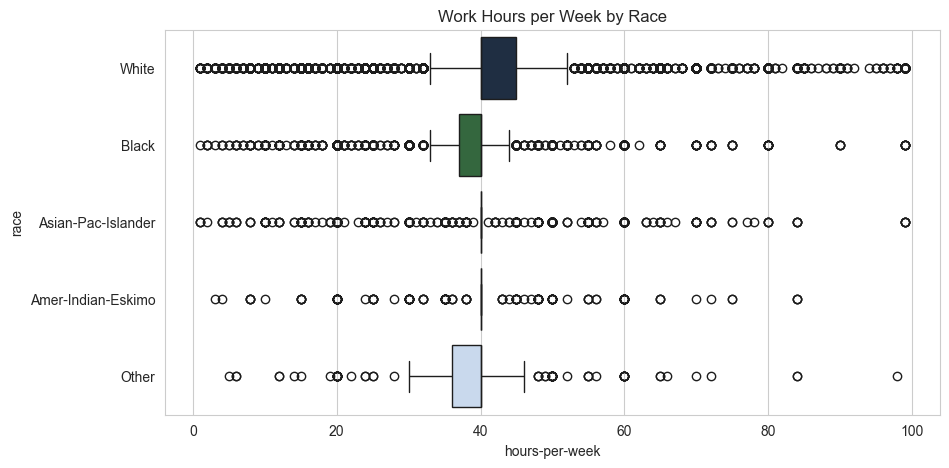

In [58]:
plt.figure(figsize=(10, 5))
sns.boxplot(y="race", x="hours-per-week", data=df, palette="cubehelix")
plt.title("Work Hours per Week by Race")
plt.show()


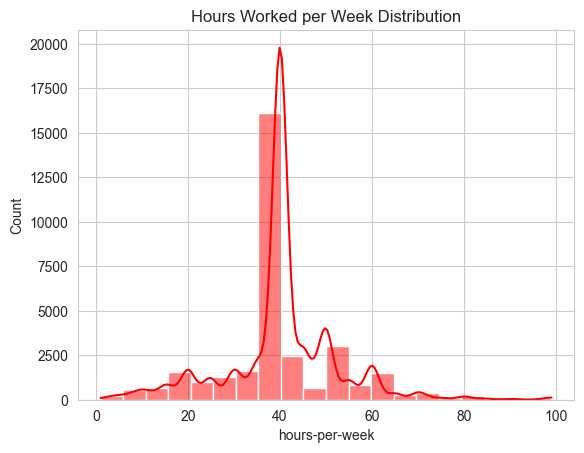

In [59]:
sns.histplot(df["hours-per-week"], bins=20, kde=True, color="red")
plt.title("Hours Worked per Week Distribution")
plt.show()

In [60]:
min_work_hours = df["hours-per-week"].min()
min_work_hours

np.int64(1)

In [61]:
min_hours_workers = df["hours-per-week"] == min_work_hours
rich_percentage = round(df.loc[min_hours_workers & high_income, "salary"].count() / df.loc[min_hours_workers, "salary"].count() * 100, 2)
rich_percentage

np.float64(10.0)

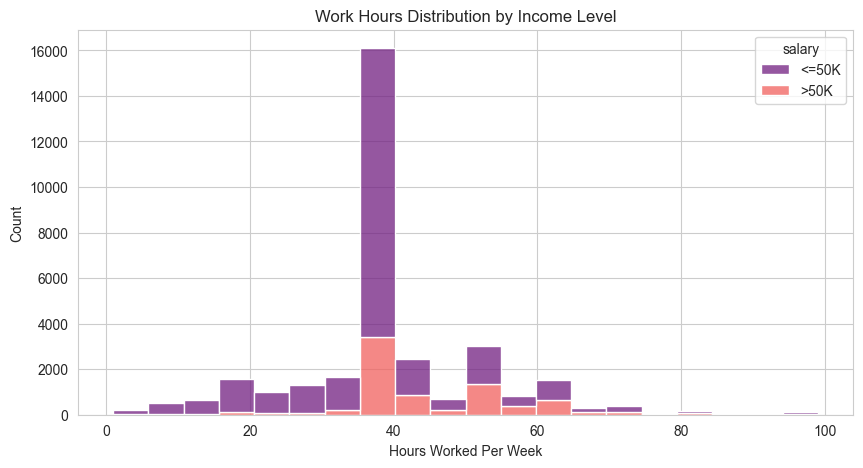

In [62]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x = "hours-per-week", hue = "salary", multiple="stack", bins=20, palette = "magma")
plt.xlabel("Hours Worked Per Week")
plt.ylabel("Count")
plt.title("Work Hours Distribution by Income Level")
plt.show()

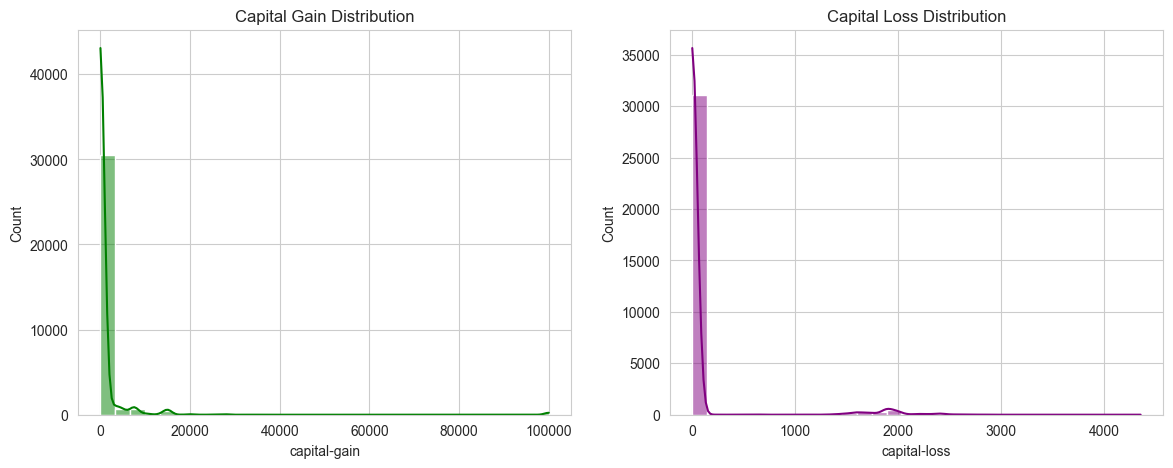

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(df["capital-gain"], bins=30, kde=True, color="green", ax=ax[0])
sns.histplot(df["capital-loss"], bins=30, kde=True, color="purple", ax=ax[1])
ax[0].set_title("Capital Gain Distribution")
ax[1].set_title("Capital Loss Distribution")
plt.show()

C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\3003292338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="race", x="capital-gain", data=df, palette="coolwarm")


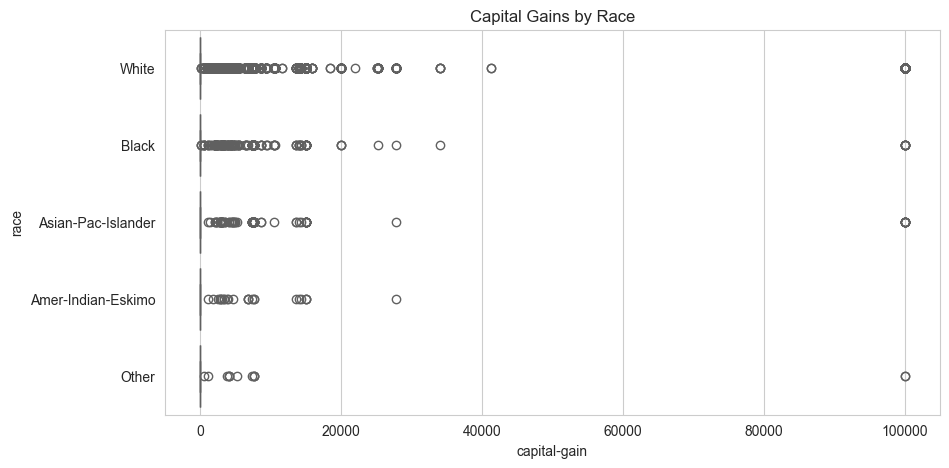

In [64]:
plt.figure(figsize=(10, 5))
sns.boxplot(y="race", x="capital-gain", data=df, palette="coolwarm")
plt.title("Capital Gains by Race")
plt.show()


C:\Users\viktor\AppData\Local\Temp\ipykernel_9644\1122893247.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[df['salary'] == '<=50K'], x="race", kde=True, palette="magma")


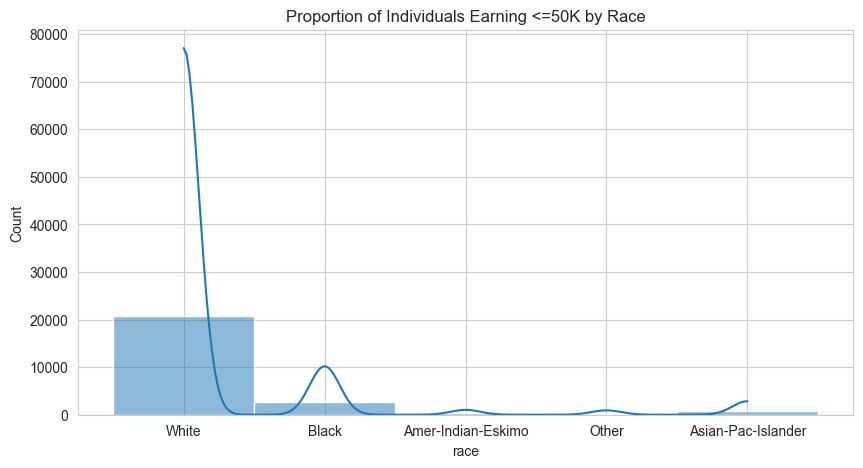

In [65]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df[df['salary'] == '<=50K'], x="race", kde=True, palette="magma")
plt.title("Proportion of Individuals Earning <=50K by Race")
plt.show()


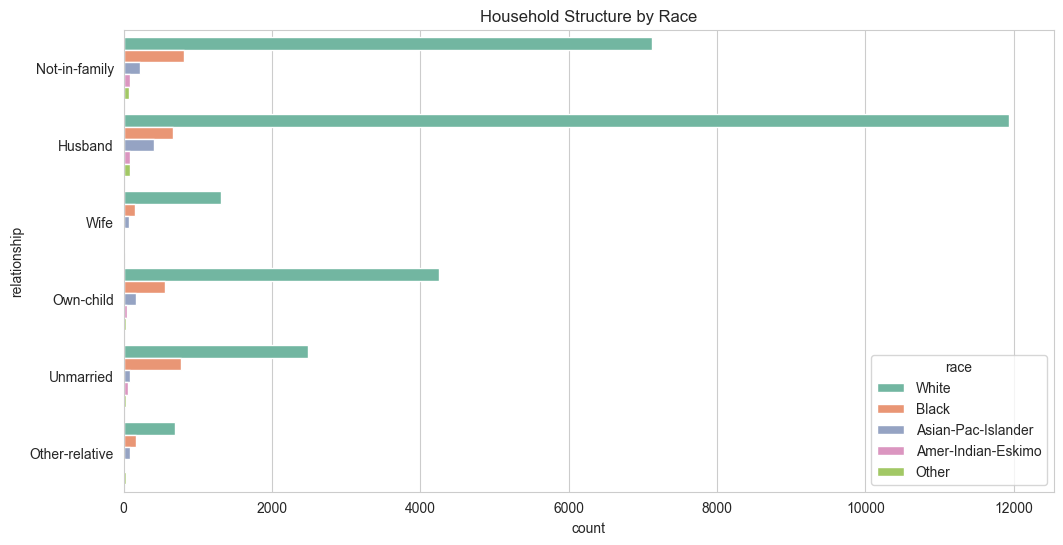

In [66]:
plt.figure(figsize=(12, 6))
sns.countplot(y="relationship", hue="race", data=df, palette="Set2")
plt.title("Household Structure by Race")
plt.show()


In [67]:
income_by_country = (df.loc[high_income, "native-country"].value_counts() / df["native-country"].value_counts() * 100).dropna()
income_by_country

native-country
Cambodia              36.842105
Canada                32.231405
China                 26.666667
Columbia               3.389831
Cuba                  26.315789
Dominican-Republic     2.857143
Ecuador               14.285714
El-Salvador            8.490566
England               33.333333
France                41.379310
Germany               32.116788
Greece                27.586207
Guatemala              4.687500
Haiti                  9.090909
Honduras               7.692308
Hong                  30.000000
Hungary               23.076923
India                 40.000000
Iran                  41.860465
Ireland               20.833333
Italy                 34.246575
Jamaica               12.345679
Japan                 38.709677
Laos                  11.111111
Mexico                 5.132193
Nicaragua              5.882353
Peru                   6.451613
Philippines           30.808081
Poland                20.000000
Portugal              10.810811
Puerto-Rico           10.

In [68]:
highest_earning_country = income_by_country.idxmax()
highest_earning_country

'Iran'

In [69]:
highest_earning_country_percentage = round(income_by_country.max(),2)
highest_earning_country_percentage

np.float64(41.86)

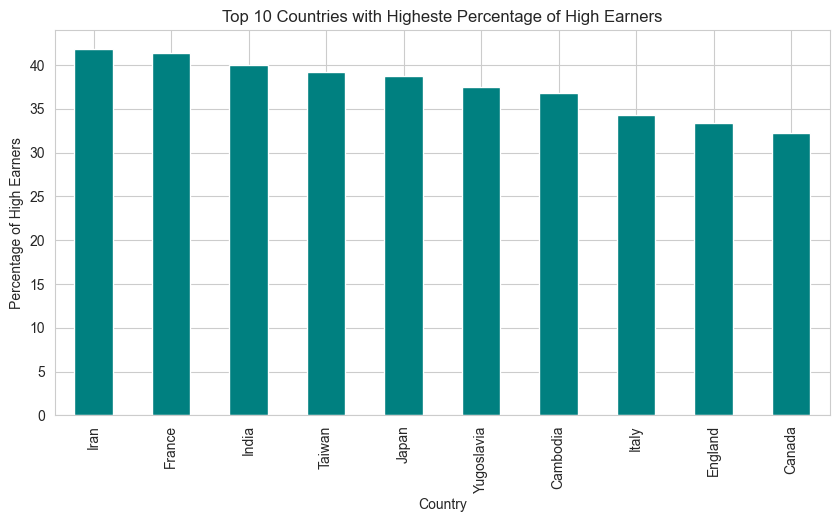

In [70]:
plt.figure(figsize=(10,5))
income_by_country.sort_values(ascending=False).head(10).plot(kind="bar", color="teal")
plt.ylabel("Percentage of High Earners")
plt.xlabel("Country")
plt.title("Top 10 Countries with Higheste Percentage of High Earners")
plt.show()

In [71]:
top_in_occupation = df.loc[(df["native-country"] == "India") & high_income, "occupation"].value_counts().idxmax()
top_in_occupation

'Prof-specialty'

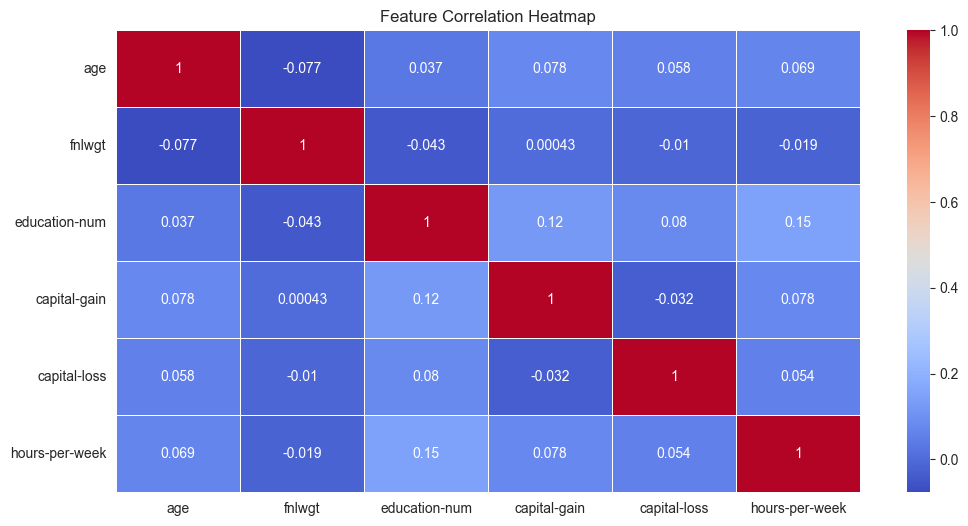

In [72]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Machine Learning Model

In [73]:
df_model = pd.get_dummies(df, drop_first=True)

X = df_model.drop(columns=["salary_>50K"])
y = df_model["salary_>50K"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
baseline_accuracy = max(y.value_counts(normalize=True))
print(f"Baseline Accuracy : {baseline_accuracy: .2f}")

Baseline Accuracy :  0.76


In [75]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
model

RandomForestClassifier(random_state=42)

In [76]:
y_pred = model.predict(X_test)
y_pred

array([False, False,  True, ...,  True, False, False])

In [77]:
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")

Model Accuracy: 0.8569015814524796


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.93      0.91      4942
        True       0.74      0.63      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



Visualizing Classification Report

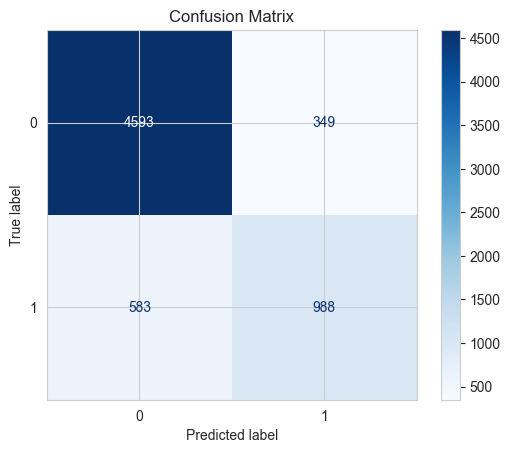

In [79]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot(cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

In [80]:
# Insights Summary
print("\nKey Insights:")
print("1. Age follows a normal distribution, with most individuals between 30-50 years old.")
print("2. Higher education levels correlate with higher salaries.")
print("3. Machine learning model achieved a reasonable accuracy score, indicating predictability of salary based on features.")
print(f"4. Baseline accuracy provides a reference point: {baseline_accuracy:.2f}")


Key Insights:
1. Age follows a normal distribution, with most individuals between 30-50 years old.
2. Higher education levels correlate with higher salaries.
3. Machine learning model achieved a reasonable accuracy score, indicating predictability of salary based on features.
4. Baseline accuracy provides a reference point: 0.76


# Other models

In [81]:
categorical_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex","native-country", "salary"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

In [82]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [83]:
X = df.drop(columns = ["salary"])
y = df["salary"]

In [84]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Machine Learning Models

In [86]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "Random Forest" : RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine" : SVC(probability=True),
    "K-Nearest Neighbors" : KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes" : GaussianNB()

}

In [87]:
results = {}

In [89]:
y_probs = {}

In [90]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs[name] = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs[name]) if y_probs[name] is not None else 0
    print(f"\n{name} Model Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC-ROC Score: {auc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = {"accuracy" : acc, "auc" : auc}


LogisticRegression Model Evaluation:
Accuracy: 0.8259
AUC-ROC Score: 0.8565
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.72      0.46      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.73      6513
weighted avg       0.81      0.83      0.81      6513


Random Forest Model Evaluation:
Accuracy: 0.8603
AUC-ROC Score: 0.9095
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.75      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513


Gradient Boosting Model Evaluation:
Accuracy: 0.8706
AUC-ROC Score: 0.9222
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4942
           1

Convert results to dataframe

In [91]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
results_df


Model Performance Summary:


,accuracy,auc
LogisticRegression,0.825887,0.856525
Random Forest,0.860279,0.909497
Gradient Boosting,0.870567,0.922235
Support Vector Machine,0.852756,0.899309
K-Nearest Neighbors,0.834638,0.854725
Naive Bayes,0.809304,0.859522


Plot ROC curves

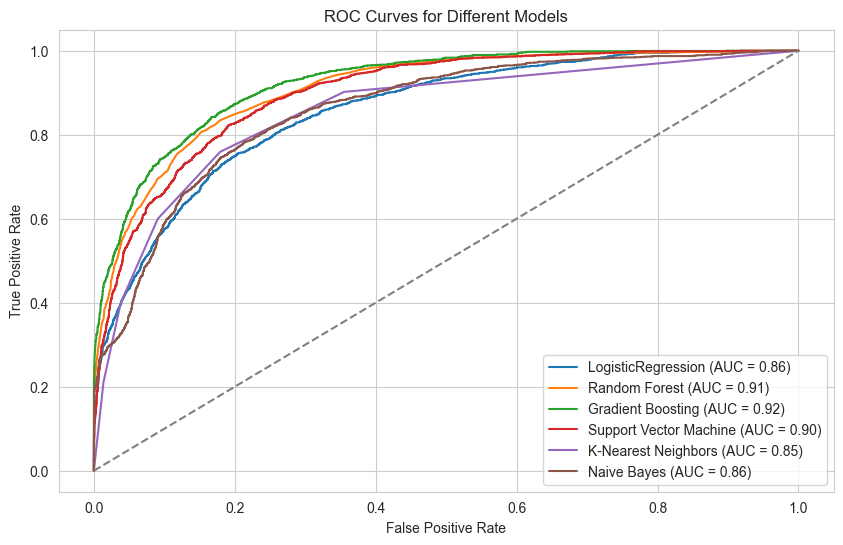

In [92]:
plt.figure(figsize=(10,6))
for name, probs in y_probs.items():
    if probs is not None:
        fpr, tpr, _ = roc_curve(y_test, probs)
        plt.plot(fpr, tpr, label = f"{name} (AUC = {results[name]["auc"]:.2f})")
plt.plot([0,1], [0,1], linestyle = "--", color = "gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.show()

Determine Best Model

In [93]:
best_model = max(results, key = lambda k: results[k]["accuracy"])
best_model_auc = max(results, key=lambda k: results[k]["auc"])
print(f"\nBest Model by Accuracy: {best_model} ({results[best_model]["accuracy"]:.4f})")
print(f'Best Model by AUC-ROC: {best_model_auc} ({results[best_model_auc]["auc"]:.4f})')


Best Model by Accuracy: Gradient Boosting (0.8706)
Best Model by AUC-ROC: Gradient Boosting (0.9222)


Feature Importance using SHAP for the best performance model

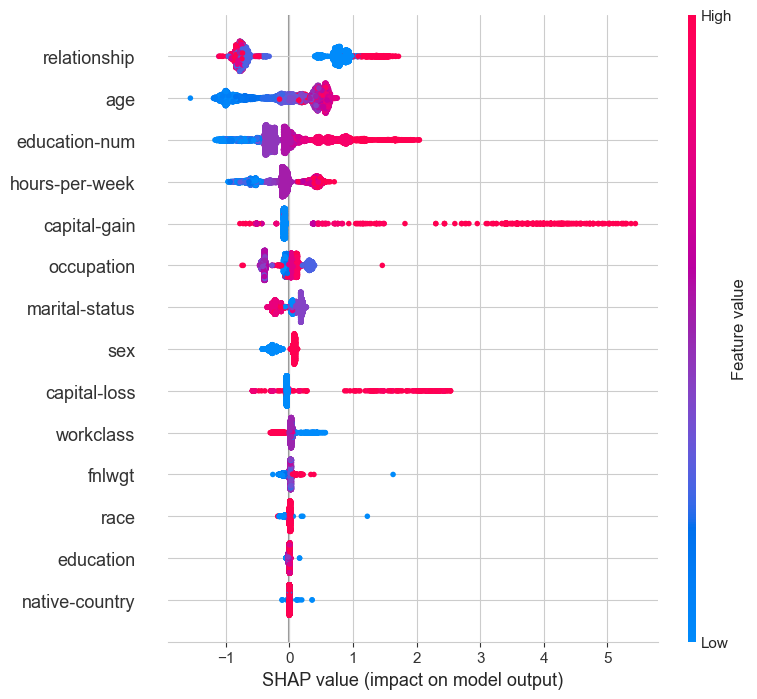

In [94]:
best_ml_model = models[best_model]
explainer = shap.Explainer(best_ml_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Insights and Recommendations
1. Education Level has a strong correlation with income levels.
2. Certain occupations and marital statuses have higher income probabilities.
3. The best model by accuracy is identified for future predictions.
4. AUC-ROC score provides additional performance validation.
5. Further tuning of hyperparameters could improve model accuracy.
 Conclusion:
The analysis revealed key insights into the factors influencing income. A Random Forest or Gradient Boosting model performed best, and additional refinements could enhance predictive performance.